# 0 - Importar Bibliotecas Necess√°rias:

In [1]:
import math
import torch
import seaborn as sns
from scipy import stats
import pandas as pd

import matplotlib.pyplot as plt
import torch.nn as nn

from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, 
	recall_score, f1_score, confusion_matrix, roc_auc_score, 
	roc_curve)
from sklearn.svm import SVC

device = 'cuda'

# 1 - An√°lise Explorat√≥ria de Dados:
Realizar an√°lise estat√≠stica dos atributos (m√©dias, desvios, valores faltantes, etc.). Gerar visualiza√ß√µes (gr√°ficos de dispers√£o, histogramas, correla√ß√µes) que ajudem na compreens√£o dos dados.

| Vari√°vel                   | Descri√ß√£o                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------|
| gender                     | Sexo biol√≥gico do paciente (1: masculino, 2: feminino)                                      |
| etiology of CKD            | Etiologia da doen√ßa renal cr√¥nica                                                           |
| CKD_stage                  | Est√°gio da doen√ßa renal cr√¥nica no in√≠cio do estudo                                         |
| urinary occult blood       | Presen√ßa de sangue oculto na urina                                                          |
| UPCR category              | Categoria do √≠ndice prote√≠na/creatinina urin√°ria                                            |
| hypertension               | Diagn√≥stico de hipertens√£o arterial                                                         |
| prevalence of CVD          | Presen√ßa pr√©via de doen√ßa cardiovascular                                                    |
| diabetes                   | Diagn√≥stico pr√©vio de diabetes mellitus                                                     |
| use of RAASi               | Uso de inibidores do sistema renina-angiotensina                                            |
| use of CCB                 | Uso de bloqueadores de canal de c√°lcio                                                      |
| use of diuretics           | Uso de diur√©ticos                                                                           |
| age_cat                    | Idade                                                                                       |
| SBP_cat                    | Press√£o arterial sist√≥lica                                                                  |
| BMI_cat                    | √çndice de massa corporal                                                                    |
| Hb_cat                     | Hemoglobina                                                                                 |
| Alb_cat                    | Albumina s√©rica                                                                             |
| Cr_cat                     | Creatinina s√©rica                                                                           |
| UPCR_cat                   | √çndice prote√≠na/creatinina urin√°ria                                                         |
| CKD progression            | Vari√°vel-alvo: progress√£o da doen√ßa renal cr√¥nica (0: n√£o, 1: sim)                         |

In [77]:
# Abrir arquivo csv
df = pd.read_csv("ckd.csv")
df.head()

Sex  Age  Systolic_Pressure   BMI  CKD_Cause  Hemoglobin  Albumin  \
0    2   74              120.0  23.1          2        12.0      4.0   
1    1   39              121.0  31.7          3        15.0      4.7   
2    1   74              143.0  24.6          2        10.9      3.8   
3    1   57              139.0  28.5          2        15.9      4.8   
4    1   32              154.0  24.6          4        14.4      4.4   

   Creatinine   eGFR  CKD_Stage  ...  Occult_Blood_in_Urine  \
0        1.20  34.15          3  ...                    0.0   
1        1.31  50.45          3  ...                    0.0   
2        4.95   9.80          5  ...                    0.0   
3        0.84  73.57          2  ...                    0.0   
4        0.87  83.56          2  ...                    0.0   

   Protein_Creatinine_Ratio  UPCR_Severity  Hypertension  Previous_CVD  \
0                      1.25            3.0             1             0   
1                      0.33            2.0             1             0   
2                      1.76            3.0             1             0   
3                      0.51            3.0             1             0   
4                      0.03            1.0             1             0   

   Diabetes  RAAS_Inhibitor  Calcium_Channel_Blocker  Diuretics  \
0         0               1                        1          0   
1         0               0                        0          0   
2         1               1                        1          1   
3         0               0                        0          0   
4         0               0                        0          0   

   CKD_Progression  
0                0  
1                0  
2                1  
3                0  
4                0  

[5 rows x 23 columns]

In [78]:
print("Valores √∫nicos de CKD_Stage:", df['CKD_Stage'].unique())

Valores √∫nicos de CKD_Stage: [3 5 2 4]


## Estat√≠sticas iniciais

In [79]:
# Quantidade de linhas e colunas
print("\nQuantidade de linhas e colunas:")
print(df.shape)


Quantidade de linhas e colunas:
(1138, 23)


In [80]:
# Tabela com desvio padr√£o, m√©dia, mediana e tipo de dados de cada coluna
stats_table = pd.DataFrame({
	'M√©dia': df.mean(),
	'Desvio Padr√£o': df.std(),
	'Mediana': df.median(),
	'Valores Nulos': df.isnull().sum(),
	'Tipo de Dado': df.dtypes
})

# Exibir a tabela
display(stats_table)

M√©dia  Desvio Padr√£o  Mediana  Valores Nulos  \
Sex                         1.304042       0.460203    1.000              0   
Age                        67.578207      13.672753   70.000              0   
Systolic_Pressure         139.793750      22.454350  138.000             18   
BMI                        23.735664       4.033175   23.300            137   
CKD_Cause                   2.260984       1.010711    2.000              0   
Hemoglobin                 11.938644       2.292645   12.000              2   
Albumin                     3.843073       0.636170    4.000             12   
Creatinine                  2.269411       1.717471    1.740              0   
eGFR                       32.712566      18.716730   29.775              0   
CKD_Stage                   3.603691       0.879886    4.000              0   
CKD_Risk                    7.084762       3.085292    7.000             88   
Dipstick_Proteinuria        1.188948       1.570792    1.000             16   
Proteinuria                 0.632799       0.482257    1.000             16   
Occult_Blood_in_Urine       0.336898       0.472861    0.000             16   
Protein_Creatinine_Ratio    2.160962       3.231214    0.740             88   
UPCR_Severity               2.289524       0.867804    3.000             88   
Hypertension                0.902460       0.296821    1.000              0   
Previous_CVD                0.268014       0.443120    0.000              0   
Diabetes                    0.370826       0.483238    0.000              0   
RAAS_Inhibitor              0.632689       0.482284    1.000              0   
Calcium_Channel_Blocker     0.471002       0.499378    0.000              0   
Diuretics                   0.334798       0.472127    0.000              0   
CKD_Progression             0.246046       0.430895    0.000              0   

                         Tipo de Dado  
Sex                             int64  
Age                             int64  
Systolic_Pressure             float64  
BMI                           float64  
CKD_Cause                       int64  
Hemoglobin                    float64  
Albumin                       float64  
Creatinine                    float64  
eGFR                          float64  
CKD_Stage                       int64  
CKD_Risk                      float64  
Dipstick_Proteinuria          float64  
Proteinuria                   float64  
Occult_Blood_in_Urine         float64  
Protein_Creatinine_Ratio      float64  
UPCR_Severity                 float64  
Hypertension                    int64  
Previous_CVD                    int64  
Diabetes                        int64  
RAAS_Inhibitor                  int64  
Calcium_Channel_Blocker         int64  
Diuretics                       int64  
CKD_Progression                 int64

## Gr√°ficos 

### Gr√°ficos de Dispers√£o:

**O que representam:**
- Cada ponto = um paciente
- Eixo X = valor da vari√°vel (ex: idade, press√£o arterial)  
- Eixo Y = resultado (progress√£o da doen√ßa ou est√°gio)

**Padr√µes importantes a observar:**
- **Separa√ß√£o clara**: Vari√°veis que separam bem os grupos s√£o boas preditoras
- **Sobreposi√ß√£o**: Muita mistura indica menor poder preditivo
- **Tend√™ncias**: Linhas ascendentes/descendentes mostram correla√ß√£o
- **Agrupamentos**: Concentra√ß√£o de pontos em certas regi√µes

**Para CKD_Progression (0/1):**
- Pontos em Y=0: pacientes SEM progress√£o
- Pontos em Y=1: pacientes COM progress√£o

**Para CKD_Stage (1-5):**
- Y=1: est√°gio inicial
- Y=5: est√°gio mais avan√ßado

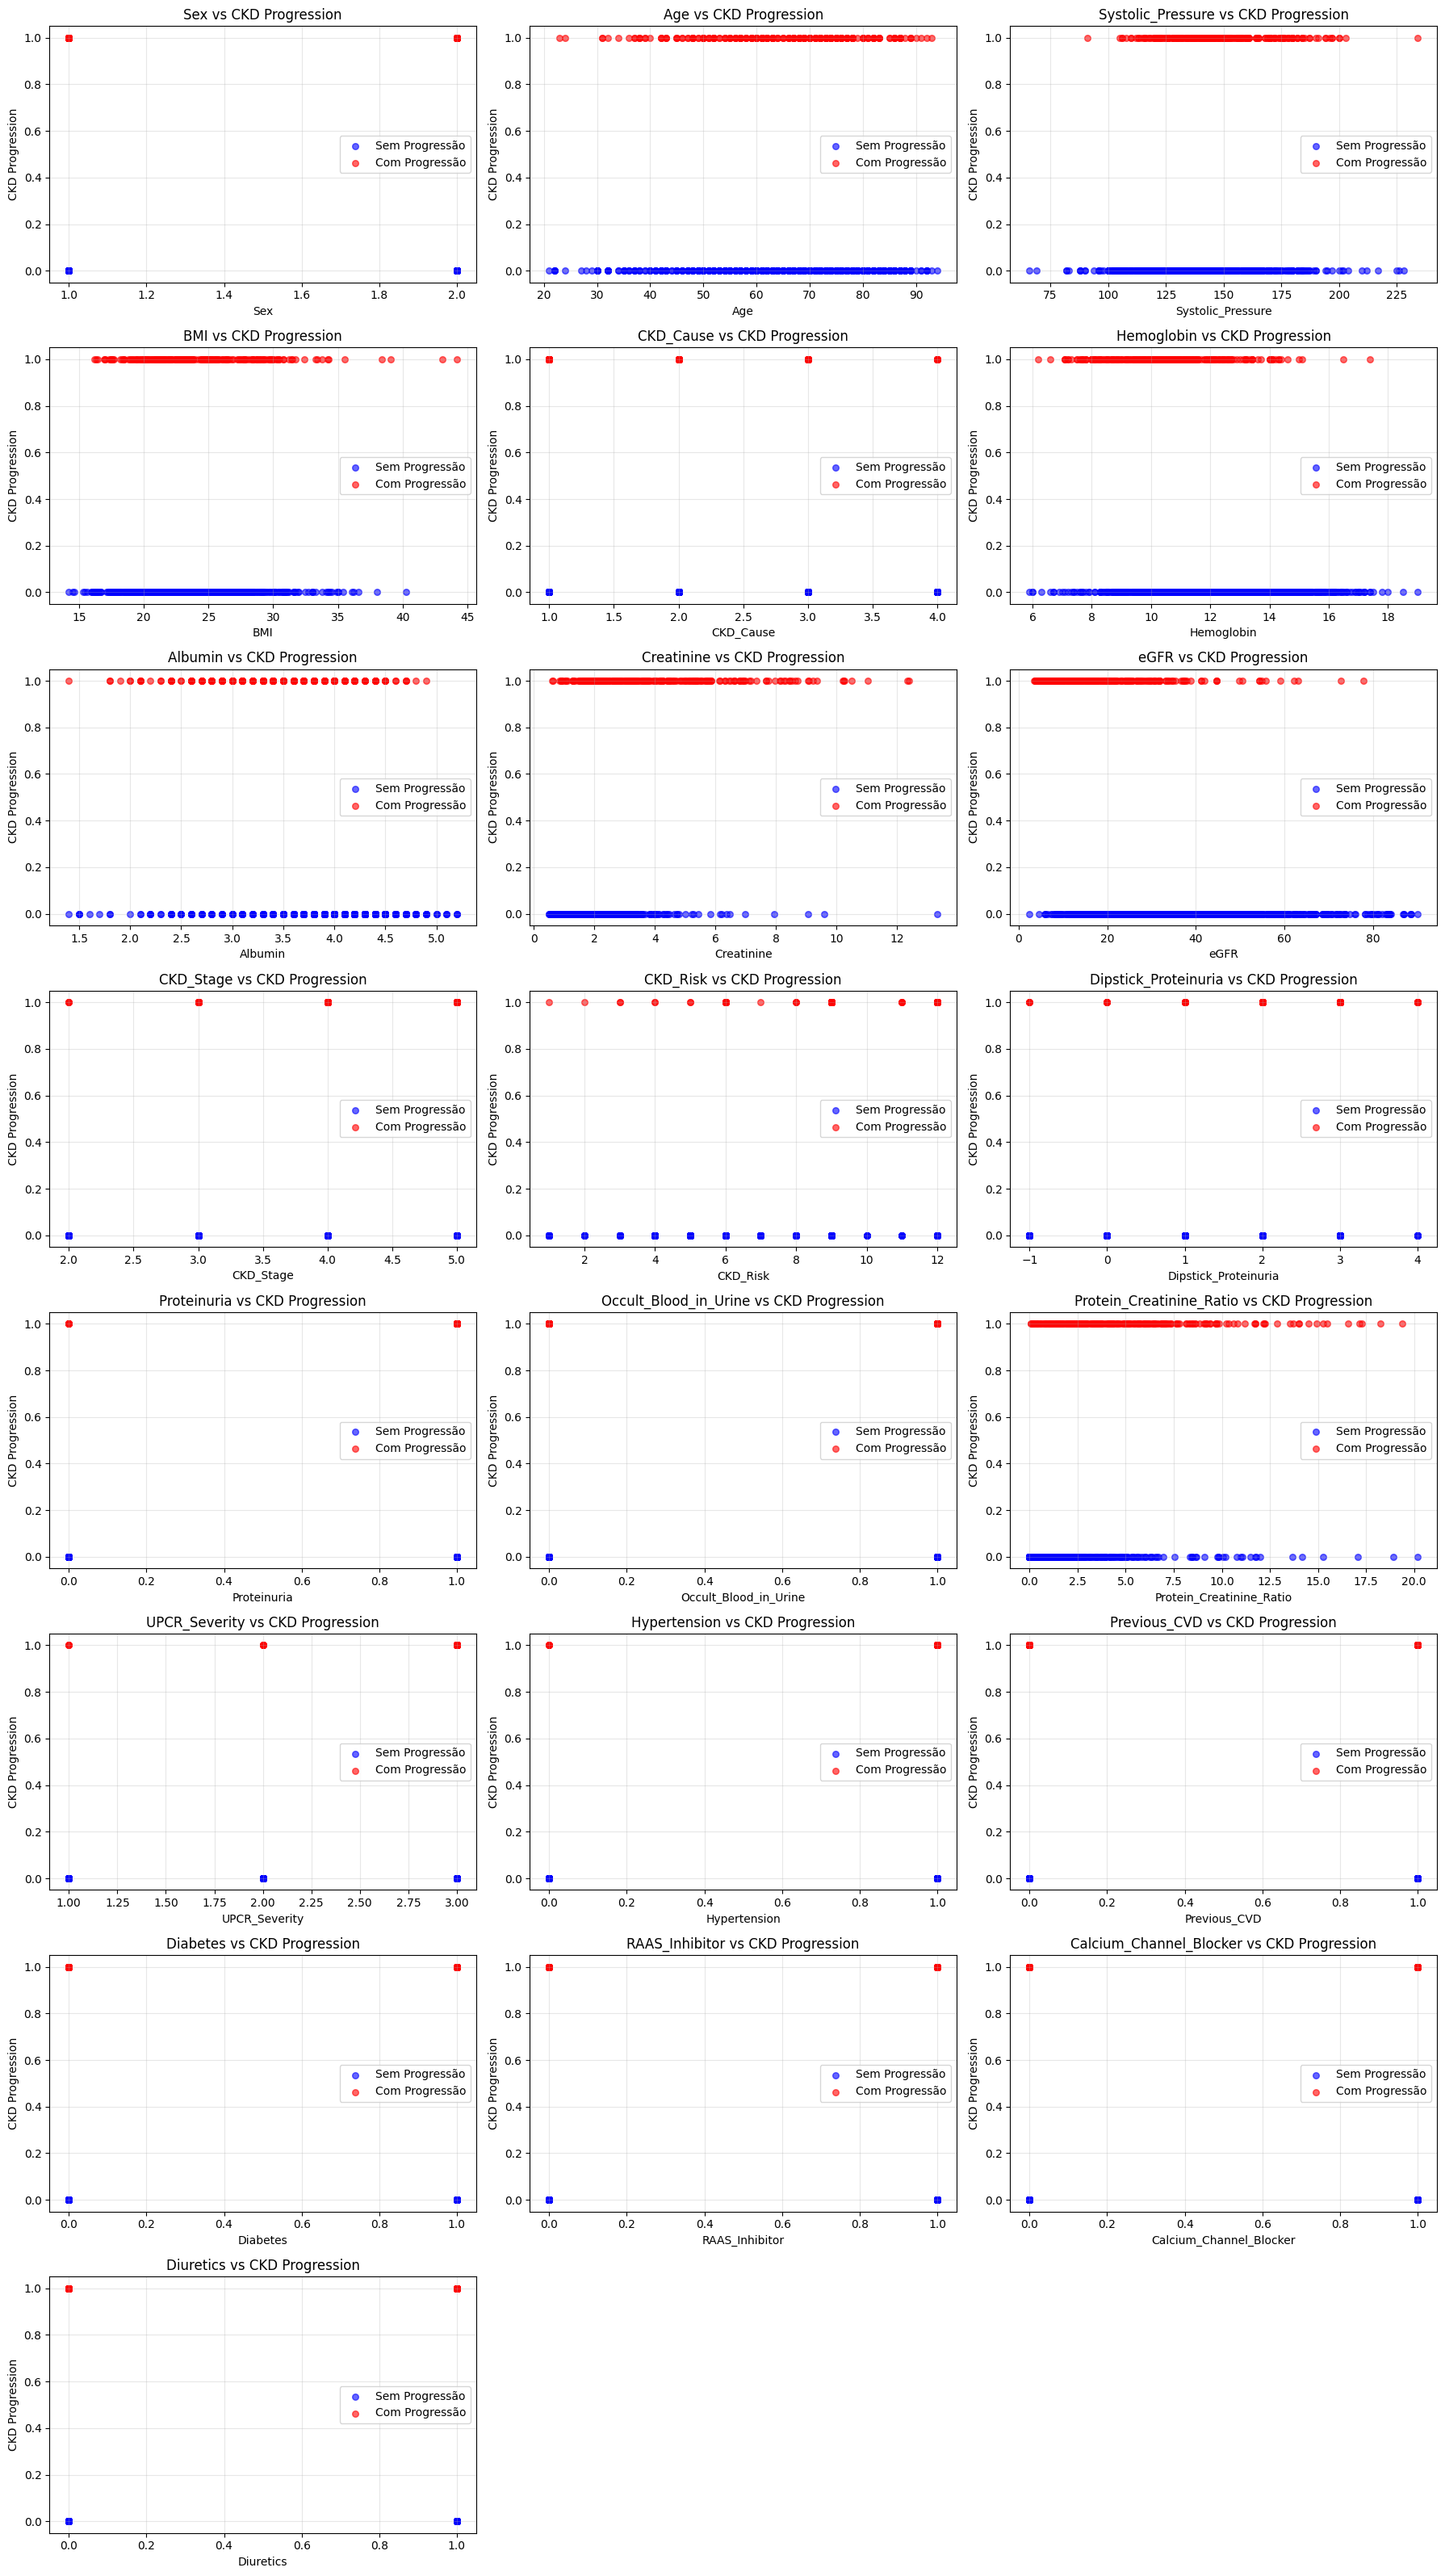

In [81]:
# Gr√°fico de dispers√£o MELHORADO para CKD_Progression com cores diferentes
import numpy as np

cols = [col for col in df.columns if col != 'CKD_Progression']
n_cols = 3
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, column in enumerate(cols):
    # Separar dados por classe
    no_progression = df[df['CKD_Progression'] == 0]
    progression = df[df['CKD_Progression'] == 1]
    
    # Plotar com cores diferentes
    axes[i].scatter(no_progression[column], no_progression['CKD_Progression'], 
                    alpha=0.6, color='blue', label='Sem Progress√£o', s=30)
    axes[i].scatter(progression[column], progression['CKD_Progression'], 
                    alpha=0.6, color='red', label='Com Progress√£o', s=30)
    
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('CKD Progression')
    axes[i].set_title(f'{column} vs CKD Progression')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# Remove eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

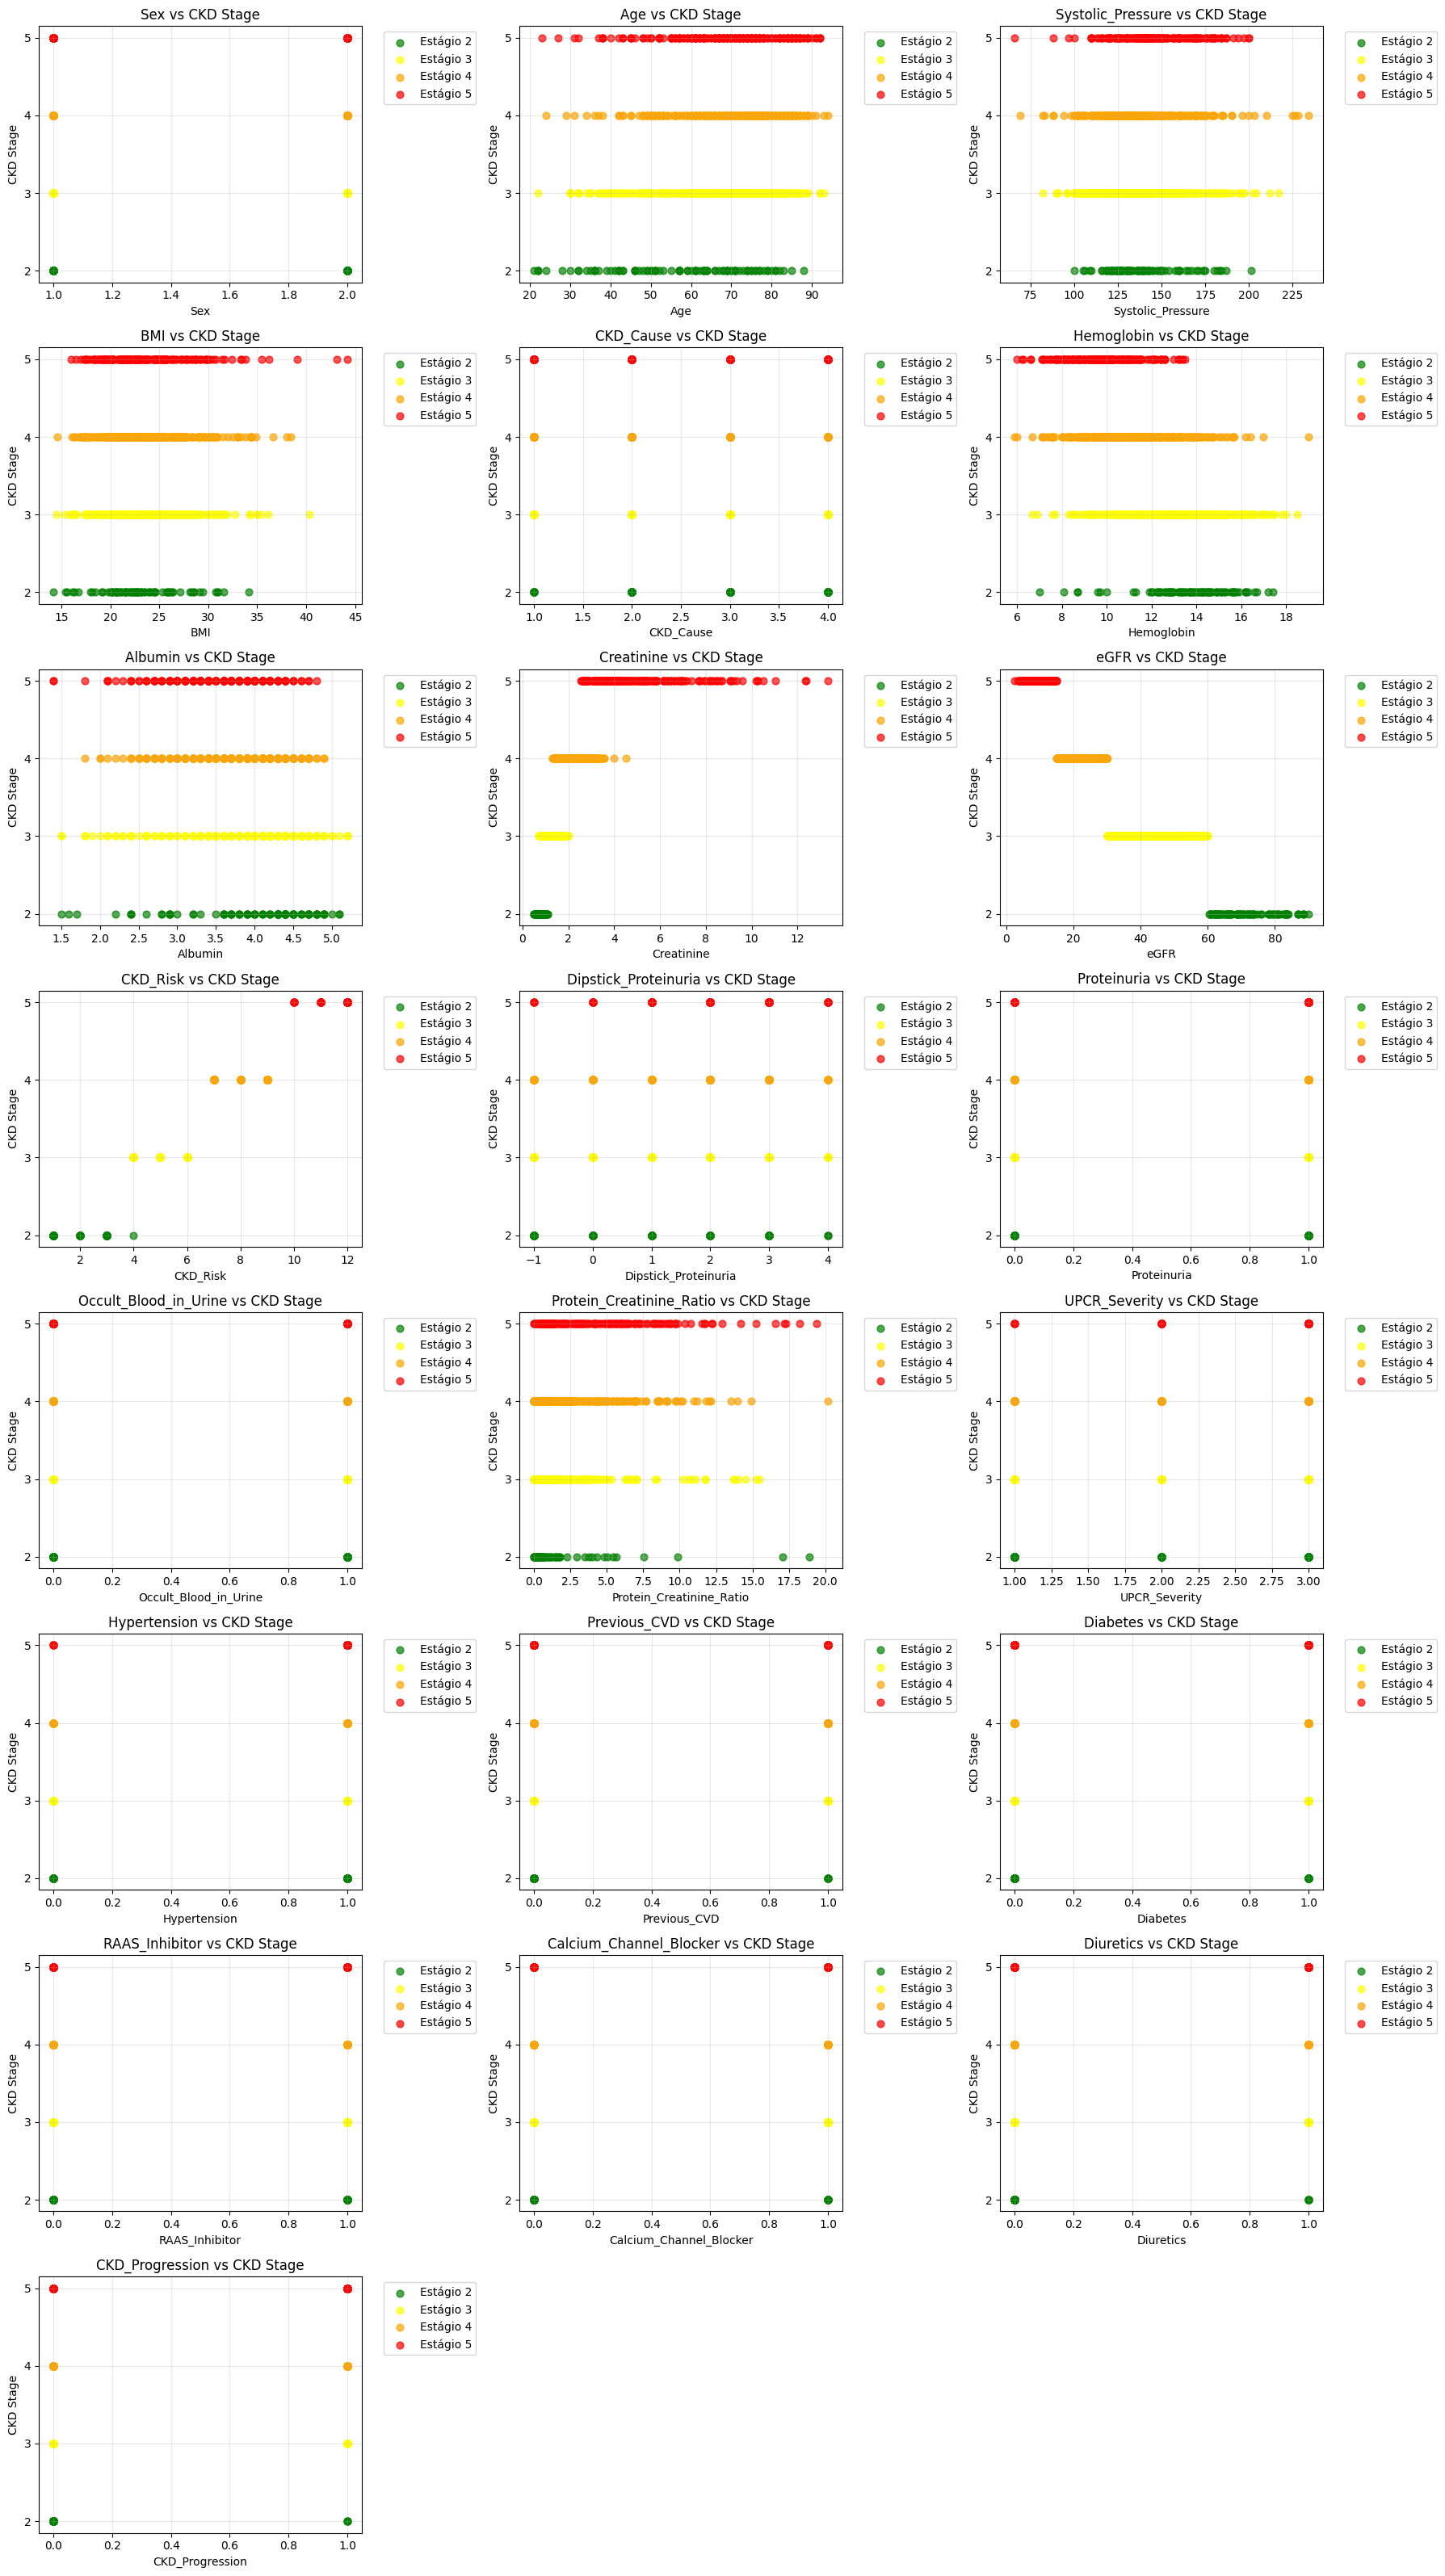

In [82]:
# Gr√°fico de dispers√£o para CKD_Stage com cores diferentes
cols = [col for col in df.columns if col != 'CKD_Stage']
n_cols = 3
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Cores diferentes para cada est√°gio
colors = ['green', 'yellow', 'orange', 'red']
stage_labels = ['Est√°gio 2', 'Est√°gio 3', 'Est√°gio 4', 'Est√°gio 5']

for i, column in enumerate(cols):
    # Plotar cada est√°gio com cor diferente
    for stage in sorted(df['CKD_Stage'].unique()):
        stage_data = df[df['CKD_Stage'] == stage]
        if len(stage_data) > 0:
            axes[i].scatter(stage_data[column], stage_data['CKD_Stage'], 
                          alpha=0.7, color=colors[stage-2], 
                          label=stage_labels[stage-2], s=40)

    axes[i].set_xlabel(column)
    axes[i].set_ylabel('CKD Stage')
    axes[i].set_title(f'{column} vs CKD Stage')
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_yticks([2, 3, 4, 5])  # Garantir que mostra todos os est√°gios

# Remove eixos extras se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Histogramas:

Histogramas s√£o gr√°ficos que mostram a distribui√ß√£o de frequ√™ncias de uma vari√°vel num√©rica. Eles permitem visualizar como os valores de uma vari√°vel se distribuem ao longo de intervalos (bins), facilitando a identifica√ß√£o de padr√µes, assimetrias, outliers e poss√≠veis agrupamentos nos dados.

**Principais pontos sobre histogramas:**
- O eixo X representa os intervalos de valores (bins) da vari√°vel.
- O eixo Y mostra a quantidade (frequ√™ncia) de observa√ß√µes em cada intervalo.
- Permitem comparar a distribui√ß√£o de uma vari√°vel entre diferentes grupos (ex: pacientes com e sem progress√£o da doen√ßa).
- S√£o √∫teis para detectar desvios, valores extremos e a forma geral da distribui√ß√£o (normal, assim√©trica, bimodal, etc).

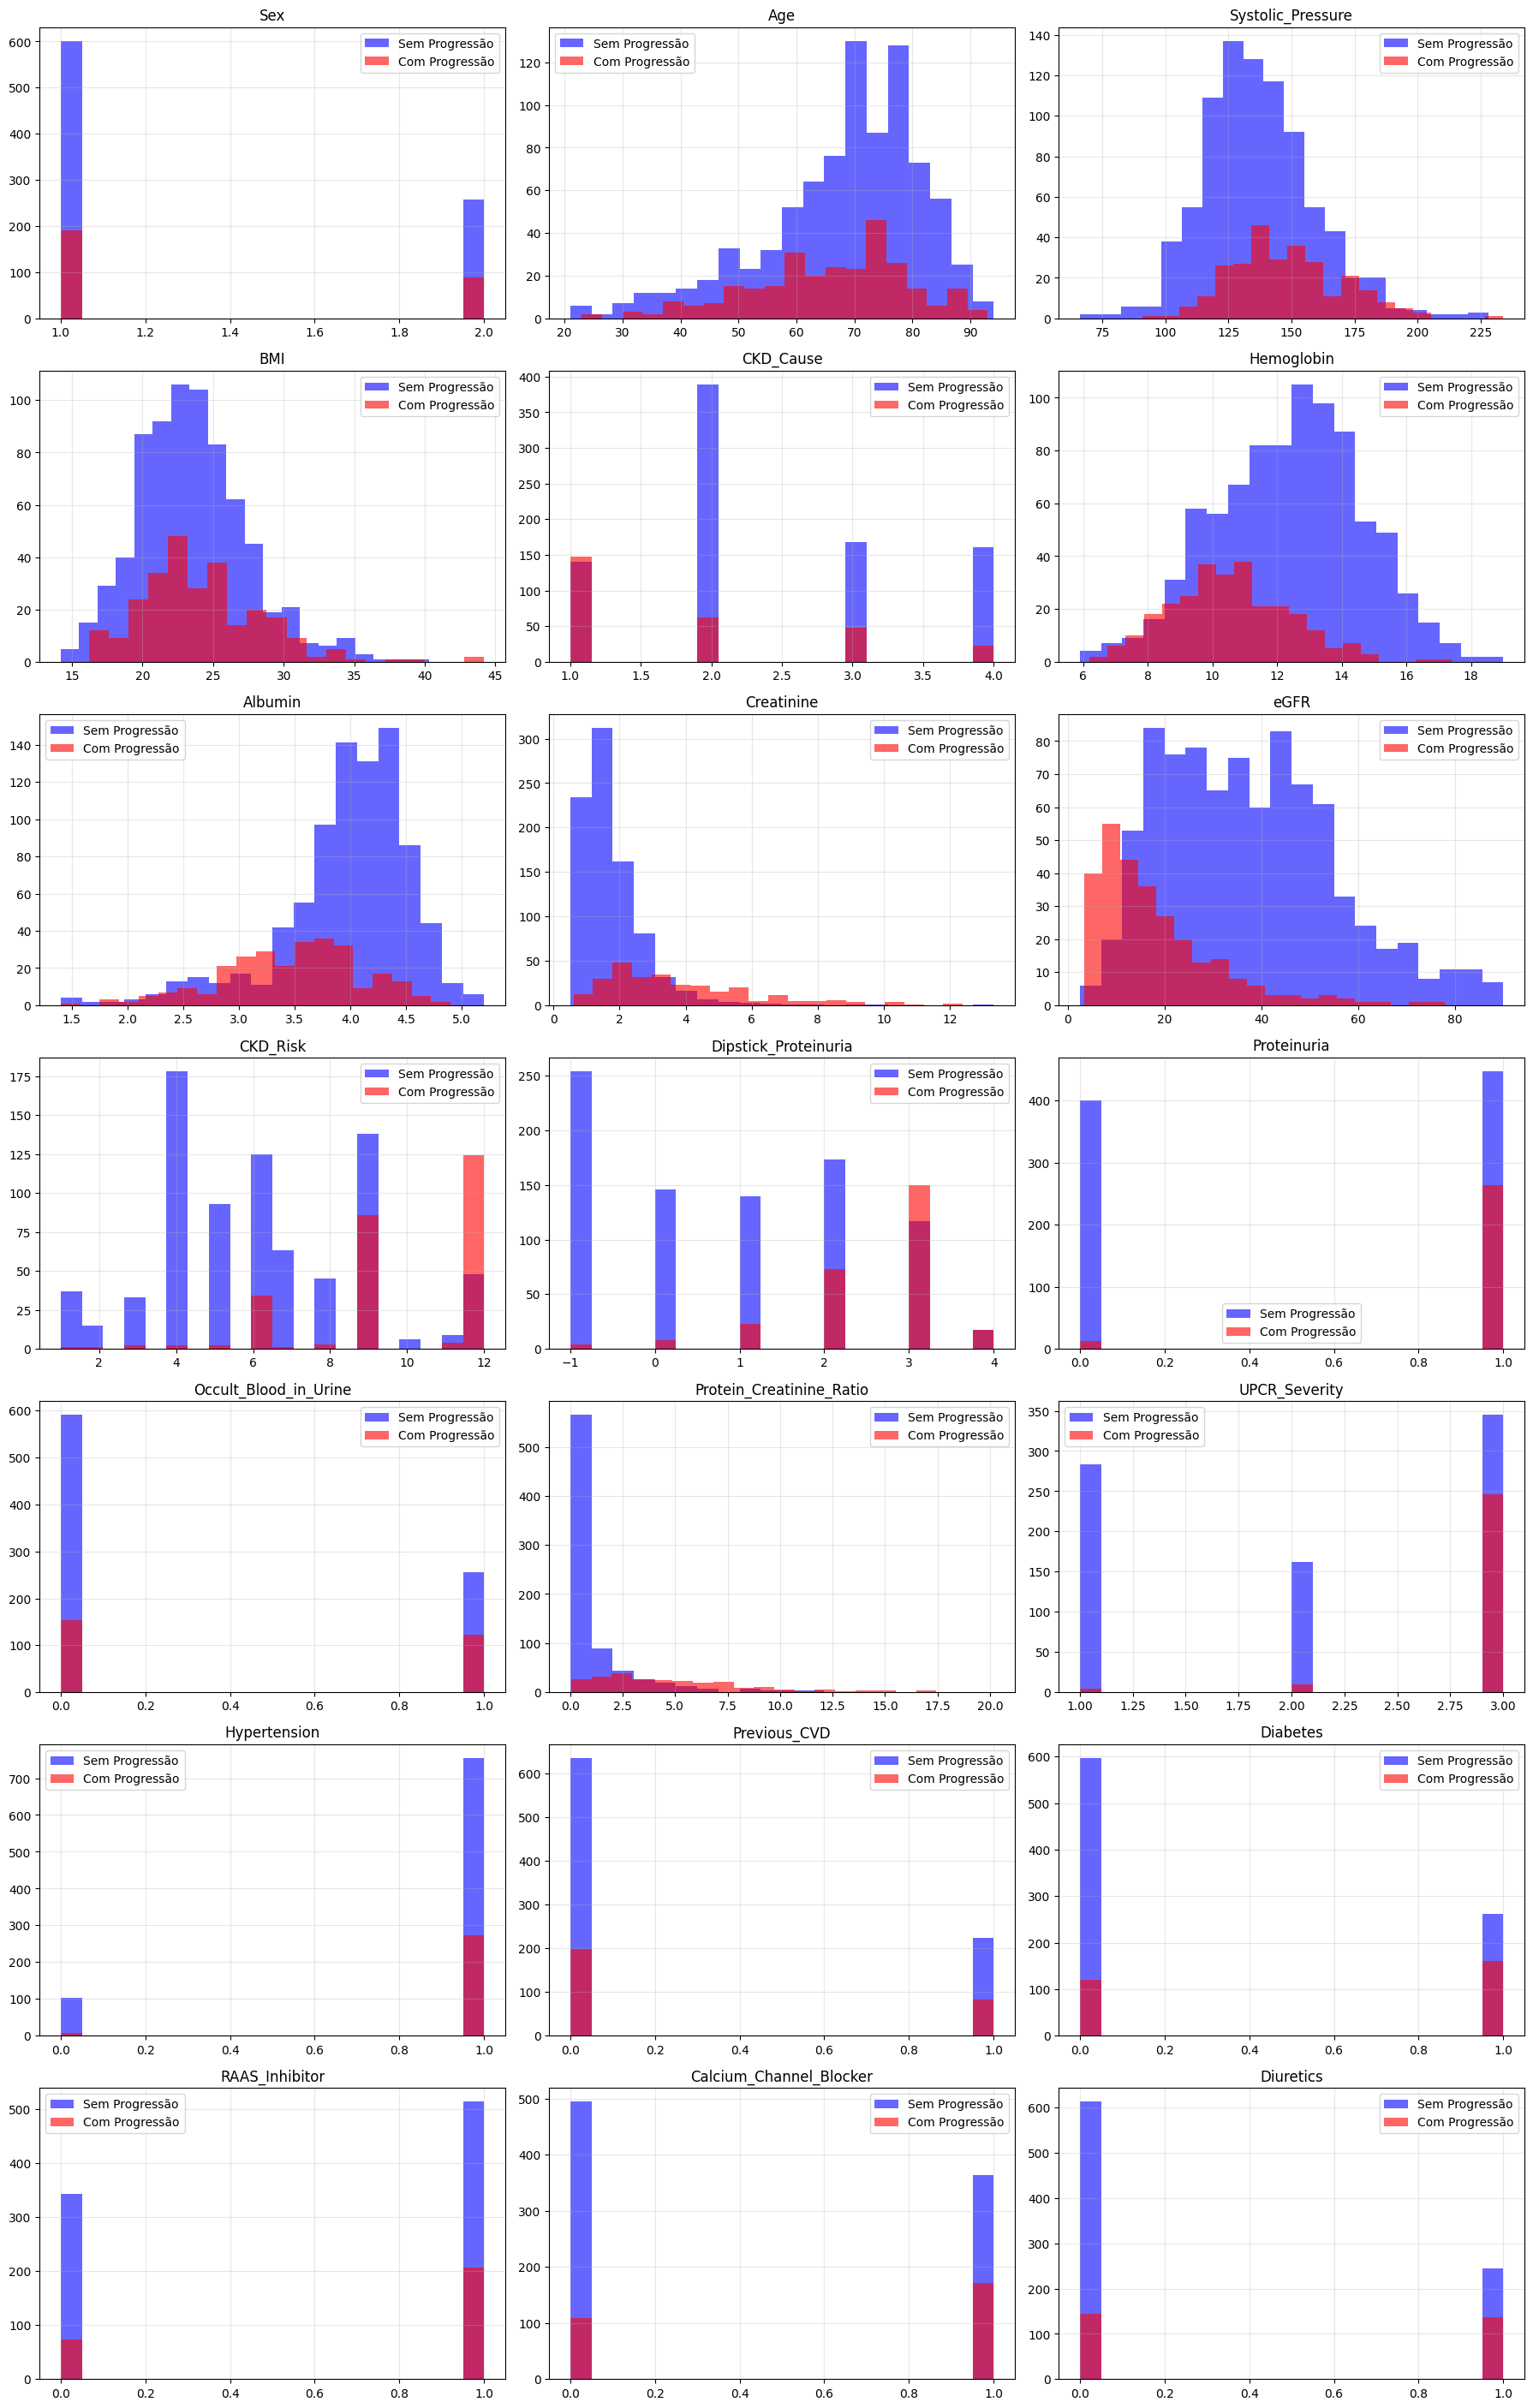

In [25]:
# Plotar histogramas para cada vari√°vel em cols, separados por CKD_Progression
n_cols = 3
n_rows = math.ceil(len(cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(cols[:-1]):
	if col == 'CKD_Progression':
		continue  # N√£o faz sentido plotar histograma da vari√°vel alvo
	# Remover valores nulos para cada grupo
	data0 = df[df['CKD_Progression'] == 0][col].dropna()
	data1 = df[df['CKD_Progression'] == 1][col].dropna()
	axes[idx].hist(data0, bins=20, alpha=0.6, label='Sem Progress√£o', color='blue')
	axes[idx].hist(data1, bins=20, alpha=0.6, label='Com Progress√£o', color='red')
	axes[idx].set_title(col)
	axes[idx].legend()
	axes[idx].grid(True, alpha=0.3)

# Remove eixos extras
for j in range(idx + 1, len(axes)):
	fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

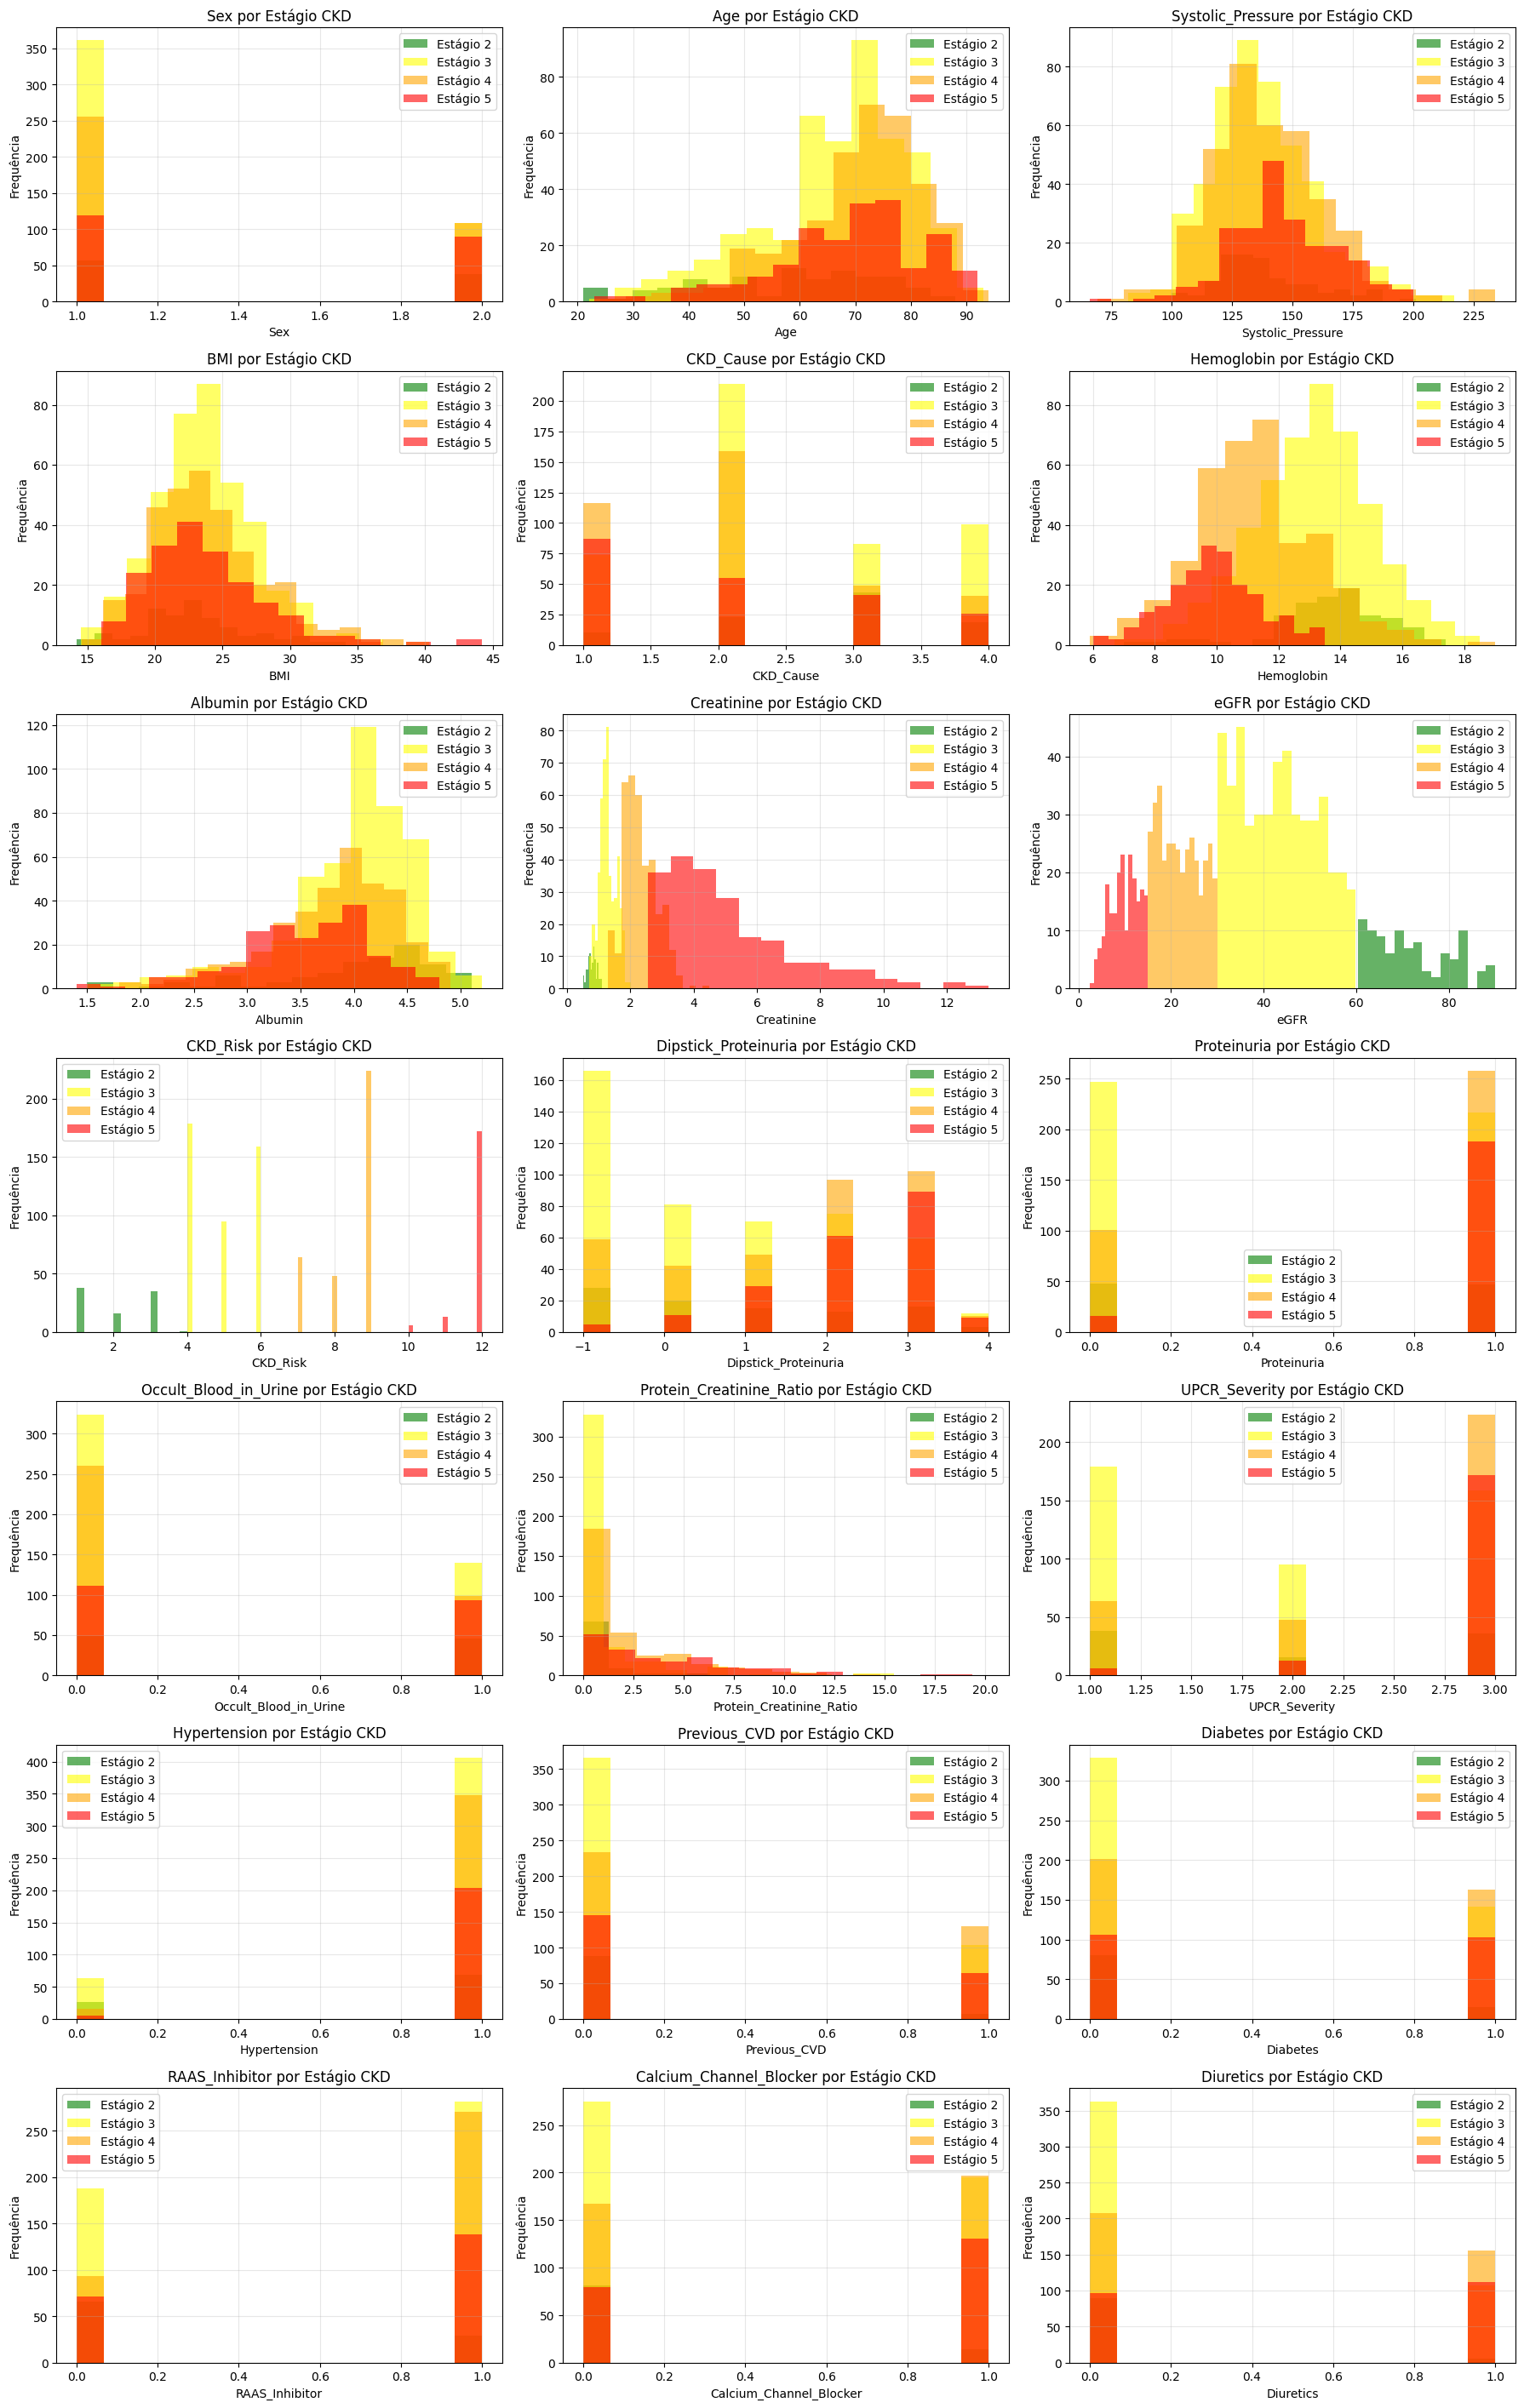

In [83]:
# Plotar histogramas para cada vari√°vel separados por CKD_Stage (CORRIGIDO)
cols_without_stage = [col for col in df.columns if col != 'CKD_Stage']
n_cols = 3
n_rows = math.ceil(len(cols_without_stage) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Cores para cada est√°gio
stage_colors = {2: 'green', 3: 'yellow', 4: 'orange', 5: 'red'}
stage_labels = {2: 'Est√°gio 2', 3: 'Est√°gio 3', 4: 'Est√°gio 4', 5: 'Est√°gio 5'}

for idx, col in enumerate(cols_without_stage[:-1]):
    if col == 'CKD_Progression':
        continue  # Pular a outra vari√°vel alvo
    
    # Plotar histograma para cada est√°gio
    for stage in sorted(df['CKD_Stage'].unique()):
        data_stage = df[df['CKD_Stage'] == stage][col].dropna()
        if len(data_stage) > 0:  # S√≥ plotar se houver dados
            axes[idx].hist(data_stage, bins=15, alpha=0.6, 
                          label=stage_labels[stage], 
                          color=stage_colors[stage])
    
    axes[idx].set_title(f'{col} por Est√°gio CKD')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequ√™ncia')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

# Remove eixos extras
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Correla√ß√µes:

#### Interpreta√ß√£o dos coeficientes de correla√ß√£o

Os valores do coeficiente de correla√ß√£o variam entre -1 e +1:

- **+1**: Correla√ß√£o positiva perfeita (as vari√°veis aumentam juntas)
- **-1**: Correla√ß√£o negativa perfeita (uma vari√°vel aumenta enquanto a outra diminui)
- **0**: Sem correla√ß√£o linear

**For√ßa da correla√ß√£o:**
- **¬±0.7 a ¬±1.0**: Correla√ß√£o forte
- **¬±0.3 a ¬±0.7**: Correla√ß√£o moderada
- **¬±0.0 a ¬±0.3**: Correla√ß√£o fraca

> **Observa√ß√£o:**  
> Correla√ß√£o n√£o implica causalidade. Mesmo que duas vari√°veis apresentem correla√ß√£o forte, isso n√£o significa que uma causa a outra.  
> Al√©m disso, o coeficiente de correla√ß√£o de Pearson avalia apenas rela√ß√µes lineares. Rela√ß√µes n√£o-lineares podem n√£o ser detectadas por esse m√©todo.

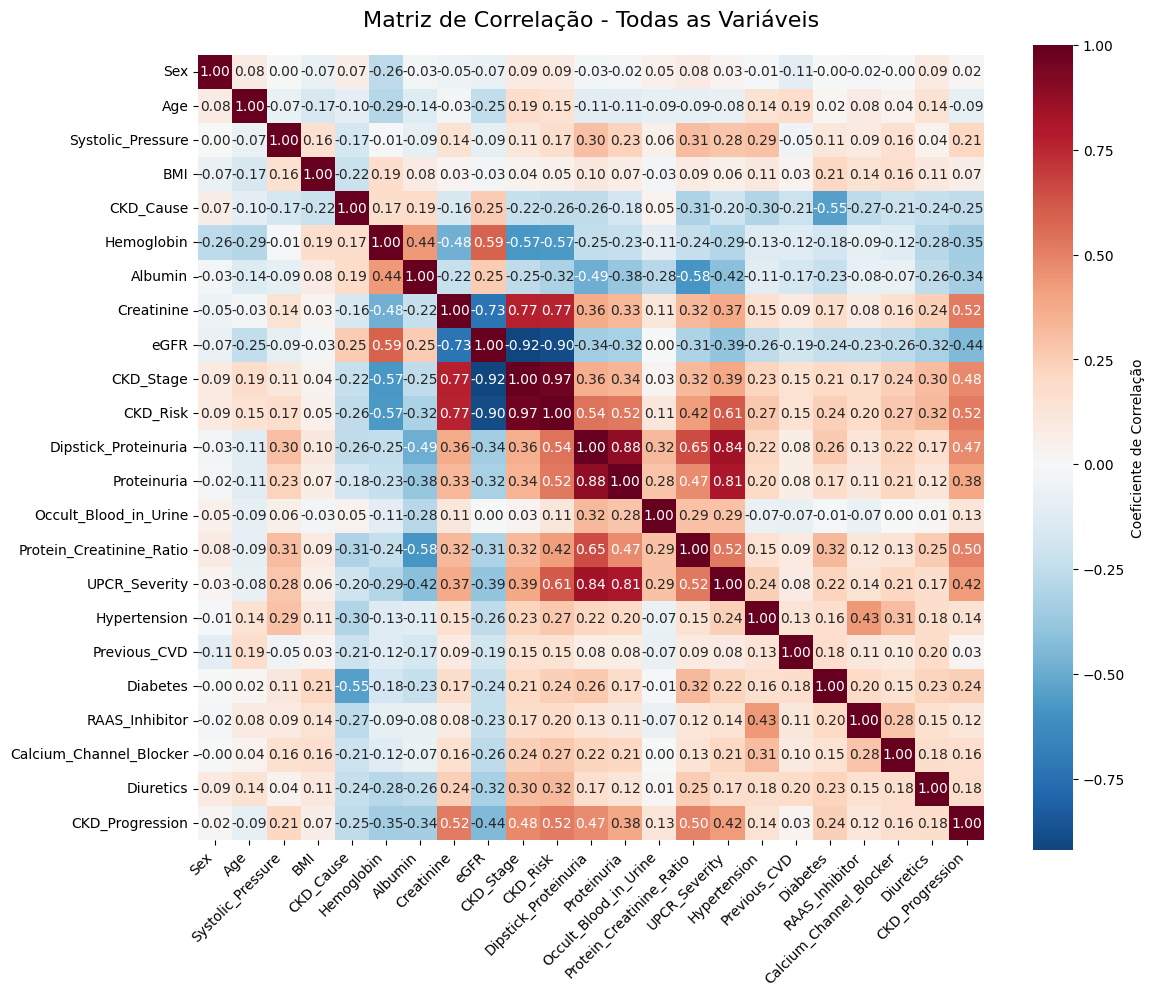

In [84]:
# Matriz de correla√ß√£o de todas as vari√°veis num√©ricas
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()

# Heatmap de correla√ß√£o
sns.heatmap(correlation_matrix, 
            annot=True,           # Mostrar valores
            cmap='RdBu_r',        # Cores: vermelho=positiva, azul=negativa
            center=0,             # Centro em 0
            square=True,          # C√©lulas quadradas
            fmt='.2f',            # 2 casas decimais
            cbar_kws={'label': 'Coeficiente de Correla√ß√£o'})

plt.title('Matriz de Correla√ß√£o - Todas as Vari√°veis', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [85]:
# Correla√ß√µes espec√≠ficas com as vari√°veis alvo
print("=== CORRELA√á√ïES COM CKD_PROGRESSION ===")
target_corr_prog = correlation_matrix['CKD_Progression'].sort_values(key=abs, ascending=False)
print(target_corr_prog)

print("\n=== CORRELA√á√ïES COM CKD_STAGE ===")
target_corr_stage = correlation_matrix['CKD_Stage'].sort_values(key=abs, ascending=False)
print(target_corr_stage)

print("\n=== AN√ÅLISE DAS CORRELA√á√ïES ===")
print("üîç Correla√ß√µes FORTES com CKD_Progression (>0.3):")
strong_prog = target_corr_prog[abs(target_corr_prog) > 0.3]
for var, corr in strong_prog.items():
    if var != 'CKD_Progression':
        direction = "positiva" if corr > 0 else "negativa"
        print(f"   {var}: {corr:.3f} ({direction})")

print("\nüîç Correla√ß√µes FORTES com CKD_Stage (>0.3):")
strong_stage = target_corr_stage[abs(target_corr_stage) > 0.3]
for var, corr in strong_stage.items():
    if var != 'CKD_Stage':
        direction = "positiva" if corr > 0 else "negativa"
        print(f"   {var}: {corr:.3f} ({direction})")

=== CORRELA√á√ïES COM CKD_PROGRESSION ===
CKD_Progression             1.000000
Creatinine                  0.519546
CKD_Risk                    0.519427
Protein_Creatinine_Ratio    0.496221
CKD_Stage                   0.475472
Dipstick_Proteinuria        0.469856
eGFR                       -0.442793
UPCR_Severity               0.424114
Proteinuria                 0.382473
Hemoglobin                 -0.346122
Albumin                    -0.335144
CKD_Cause                  -0.254608
Diabetes                    0.237247
Systolic_Pressure           0.208264
Diuretics                   0.182685
Calcium_Channel_Blocker     0.163981
Hypertension                0.139671
Occult_Blood_in_Urine       0.128678
RAAS_Inhibitor              0.122086
Age                        -0.087465
BMI                         0.066758
Previous_CVD                0.032041
Sex                         0.017156
Name: CKD_Progression, dtype: float64

=== CORRELA√á√ïES COM CKD_STAGE ===
CKD_Stage                   1.00

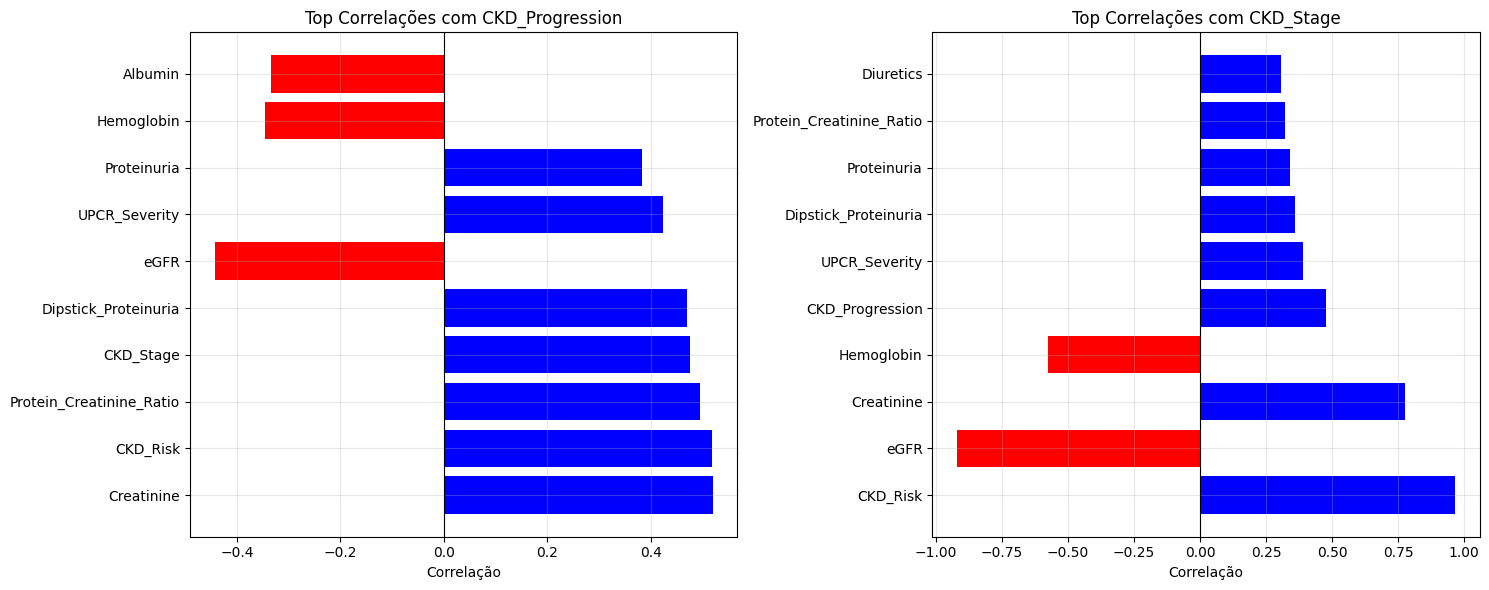

In [86]:
# Gr√°fico de barras das correla√ß√µes mais importantes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Correla√ß√µes com CKD_Progression (excluindo ela mesma)
prog_corr = target_corr_prog.drop('CKD_Progression')
top_prog = prog_corr.head(10)  # Top 10

ax1.barh(range(len(top_prog)), top_prog.values, 
         color=['red' if x < 0 else 'blue' for x in top_prog.values])
ax1.set_yticks(range(len(top_prog)))
ax1.set_yticklabels(top_prog.index)
ax1.set_xlabel('Correla√ß√£o')
ax1.set_title('Top Correla√ß√µes com CKD_Progression')
ax1.grid(True, alpha=0.3)
ax1.axvline(0, color='black', linewidth=0.8)

# Correla√ß√µes com CKD_Stage (excluindo ela mesma)
stage_corr = target_corr_stage.drop('CKD_Stage')
top_stage = stage_corr.head(10)  # Top 10

ax2.barh(range(len(top_stage)), top_stage.values,
         color=['red' if x < 0 else 'blue' for x in top_stage.values])
ax2.set_yticks(range(len(top_stage)))
ax2.set_yticklabels(top_stage.index)
ax2.set_xlabel('Correla√ß√£o')
ax2.set_title('Top Correla√ß√µes com CKD_Stage')
ax2.grid(True, alpha=0.3)
ax2.axvline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()

## Outliers:

#### 1. M√©todo IQR (Interquartile Range) - Quartis


**Como funciona:**
- Calcula Q1 (25¬∫ percentil) e Q3 (75¬∫ percentil)
- IQR = Q3 - Q1
- Outliers: valores < Q1 - 1.5√óIQR ou > Q3 + 1.5√óIQR

**Vantagens:**
- Robusto para dados assim√©tricos
- N√£o assume distribui√ß√£o normal
- F√°cil interpreta√ß√£o

**Desvantagens:**
- Pode ser conservador (detecta poucos outliers)

---

In [87]:
## Detec√ß√£o de Outliers

### M√©todo 1: IQR (Interquartile Range)
print("=== DETEC√á√ÉO DE OUTLIERS - M√âTODO IQR ===\n")

def detect_outliers_iqr(df, column):
    """Detecta outliers usando o m√©todo IQR"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Limites para outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Analisar cada vari√°vel num√©rica
numeric_columns = df.select_dtypes(include=[np.number]).columns

outlier_summary = {}
for col in numeric_columns:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary[col] = {
        'count': outlier_count,
        'percentage': outlier_percentage,
        'lower_bound': lower,
        'upper_bound': upper
    }
    
    print(f"üìä {col}:")
    print(f"   Outliers: {outlier_count} ({outlier_percentage:.1f}%)")
    print(f"   Limites: [{lower:.2f}, {upper:.2f}]")
    if outlier_count > 0:
        print(f"   Valores extremos: {outliers[col].min():.2f} a {outliers[col].max():.2f}")
    print()

=== DETEC√á√ÉO DE OUTLIERS - M√âTODO IQR ===

üìä Sex:
   Outliers: 0 (0.0%)
   Limites: [-0.50, 3.50]

üìä Age:
   Outliers: 37 (3.3%)
   Limites: [37.00, 101.00]
   Valores extremos: 21.00 a 36.00

üìä Systolic_Pressure:
   Outliers: 27 (2.4%)
   Limites: [84.50, 192.50]
   Valores extremos: 66.00 a 234.00

üìä BMI:
   Outliers: 26 (2.3%)
   Limites: [13.80, 33.00]
   Valores extremos: 33.30 a 44.20

üìä CKD_Cause:
   Outliers: 0 (0.0%)
   Limites: [-2.00, 6.00]

üìä Hemoglobin:
   Outliers: 1 (0.1%)
   Limites: [5.10, 18.70]
   Valores extremos: 19.00 a 19.00

üìä Albumin:
   Outliers: 30 (2.6%)
   Limites: [2.30, 5.50]
   Valores extremos: 1.40 a 2.30

üìä Creatinine:
   Outliers: 89 (7.8%)
   Limites: [-1.02, 4.90]
   Valores extremos: 4.95 a 13.32

üìä eGFR:
   Outliers: 7 (0.6%)
   Limites: [-23.71, 86.18]
   Valores extremos: 86.78 a 89.98

üìä CKD_Stage:
   Outliers: 0 (0.0%)
   Limites: [1.50, 5.50]

üìä CKD_Risk:
   Outliers: 0 (0.0%)
   Limites: [-3.50, 16.50]



#### 2. M√©todo Z-Score - Desvio Padr√£o

**Como funciona:**
- Calcula quantos desvios padr√£o cada valor est√° da m√©dia
- Z = (valor - m√©dia) / desvio padr√£o
- Outliers: |Z| > 3 (padr√£o)

**Vantagens:**
- Sens√≠vel a valores extremos
- Padr√£o estat√≠stico bem estabelecido

**Desvantagens:**
- Assume distribui√ß√£o normal
- Sens√≠vel a outliers extremos

---

In [88]:
### M√©todo 2: Z-Score
print("=== DETEC√á√ÉO DE OUTLIERS - M√âTODO Z-SCORE ===\n")

def detect_outliers_zscore(df, column, threshold=3):
    """Detecta outliers usando Z-Score (padr√£o: |z| > 3)"""
    z_scores = np.abs(stats.zscore(df[column].dropna()))
    outliers_idx = np.where(z_scores > threshold)[0]
    return outliers_idx, z_scores

for col in numeric_columns:
    outliers_idx, z_scores = detect_outliers_zscore(df, col)
    outlier_count = len(outliers_idx)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    print(f"üìä {col}:")
    print(f"   Outliers Z-Score: {outlier_count} ({outlier_percentage:.1f}%)")
    if outlier_count > 0:
        max_z = z_scores.max()
        print(f"   Z-Score m√°ximo: {max_z:.2f}")
    print()

=== DETEC√á√ÉO DE OUTLIERS - M√âTODO Z-SCORE ===

üìä Sex:
   Outliers Z-Score: 0 (0.0%)

üìä Age:
   Outliers Z-Score: 8 (0.7%)
   Z-Score m√°ximo: 3.41

üìä Systolic_Pressure:
   Outliers Z-Score: 9 (0.8%)
   Z-Score m√°ximo: 4.20

üìä BMI:
   Outliers Z-Score: 9 (0.8%)
   Z-Score m√°ximo: 5.08

üìä CKD_Cause:
   Outliers Z-Score: 0 (0.0%)

üìä Hemoglobin:
   Outliers Z-Score: 1 (0.1%)
   Z-Score m√°ximo: 3.08

üìä Albumin:
   Outliers Z-Score: 12 (1.1%)
   Z-Score m√°ximo: 3.84

üìä Creatinine:
   Outliers Z-Score: 28 (2.5%)
   Z-Score m√°ximo: 6.44

üìä eGFR:
   Outliers Z-Score: 1 (0.1%)
   Z-Score m√°ximo: 3.06

üìä CKD_Stage:
   Outliers Z-Score: 0 (0.0%)

üìä CKD_Risk:
   Outliers Z-Score: 0 (0.0%)

üìä Dipstick_Proteinuria:
   Outliers Z-Score: 0 (0.0%)

üìä Proteinuria:
   Outliers Z-Score: 0 (0.0%)

üìä Occult_Blood_in_Urine:
   Outliers Z-Score: 0 (0.0%)

üìä Protein_Creatinine_Ratio:
   Outliers Z-Score: 24 (2.1%)
   Z-Score m√°ximo: 5.58

üìä UPCR_Severity

#### 3. Boxplots - Visualiza√ß√£o

**Como funciona:**
- Baseado no m√©todo IQR
- Mostra Q1, mediana, Q3 e outliers
- Pontos fora dos "bigodes" s√£o outliers

**Vantagens:**
- Visualiza√ß√£o clara
- Mostra distribui√ß√£o dos dados
- F√°cil identifica√ß√£o visual

**Desvantagens:**
- Apenas visualiza√ß√£o (n√£o quantifica)

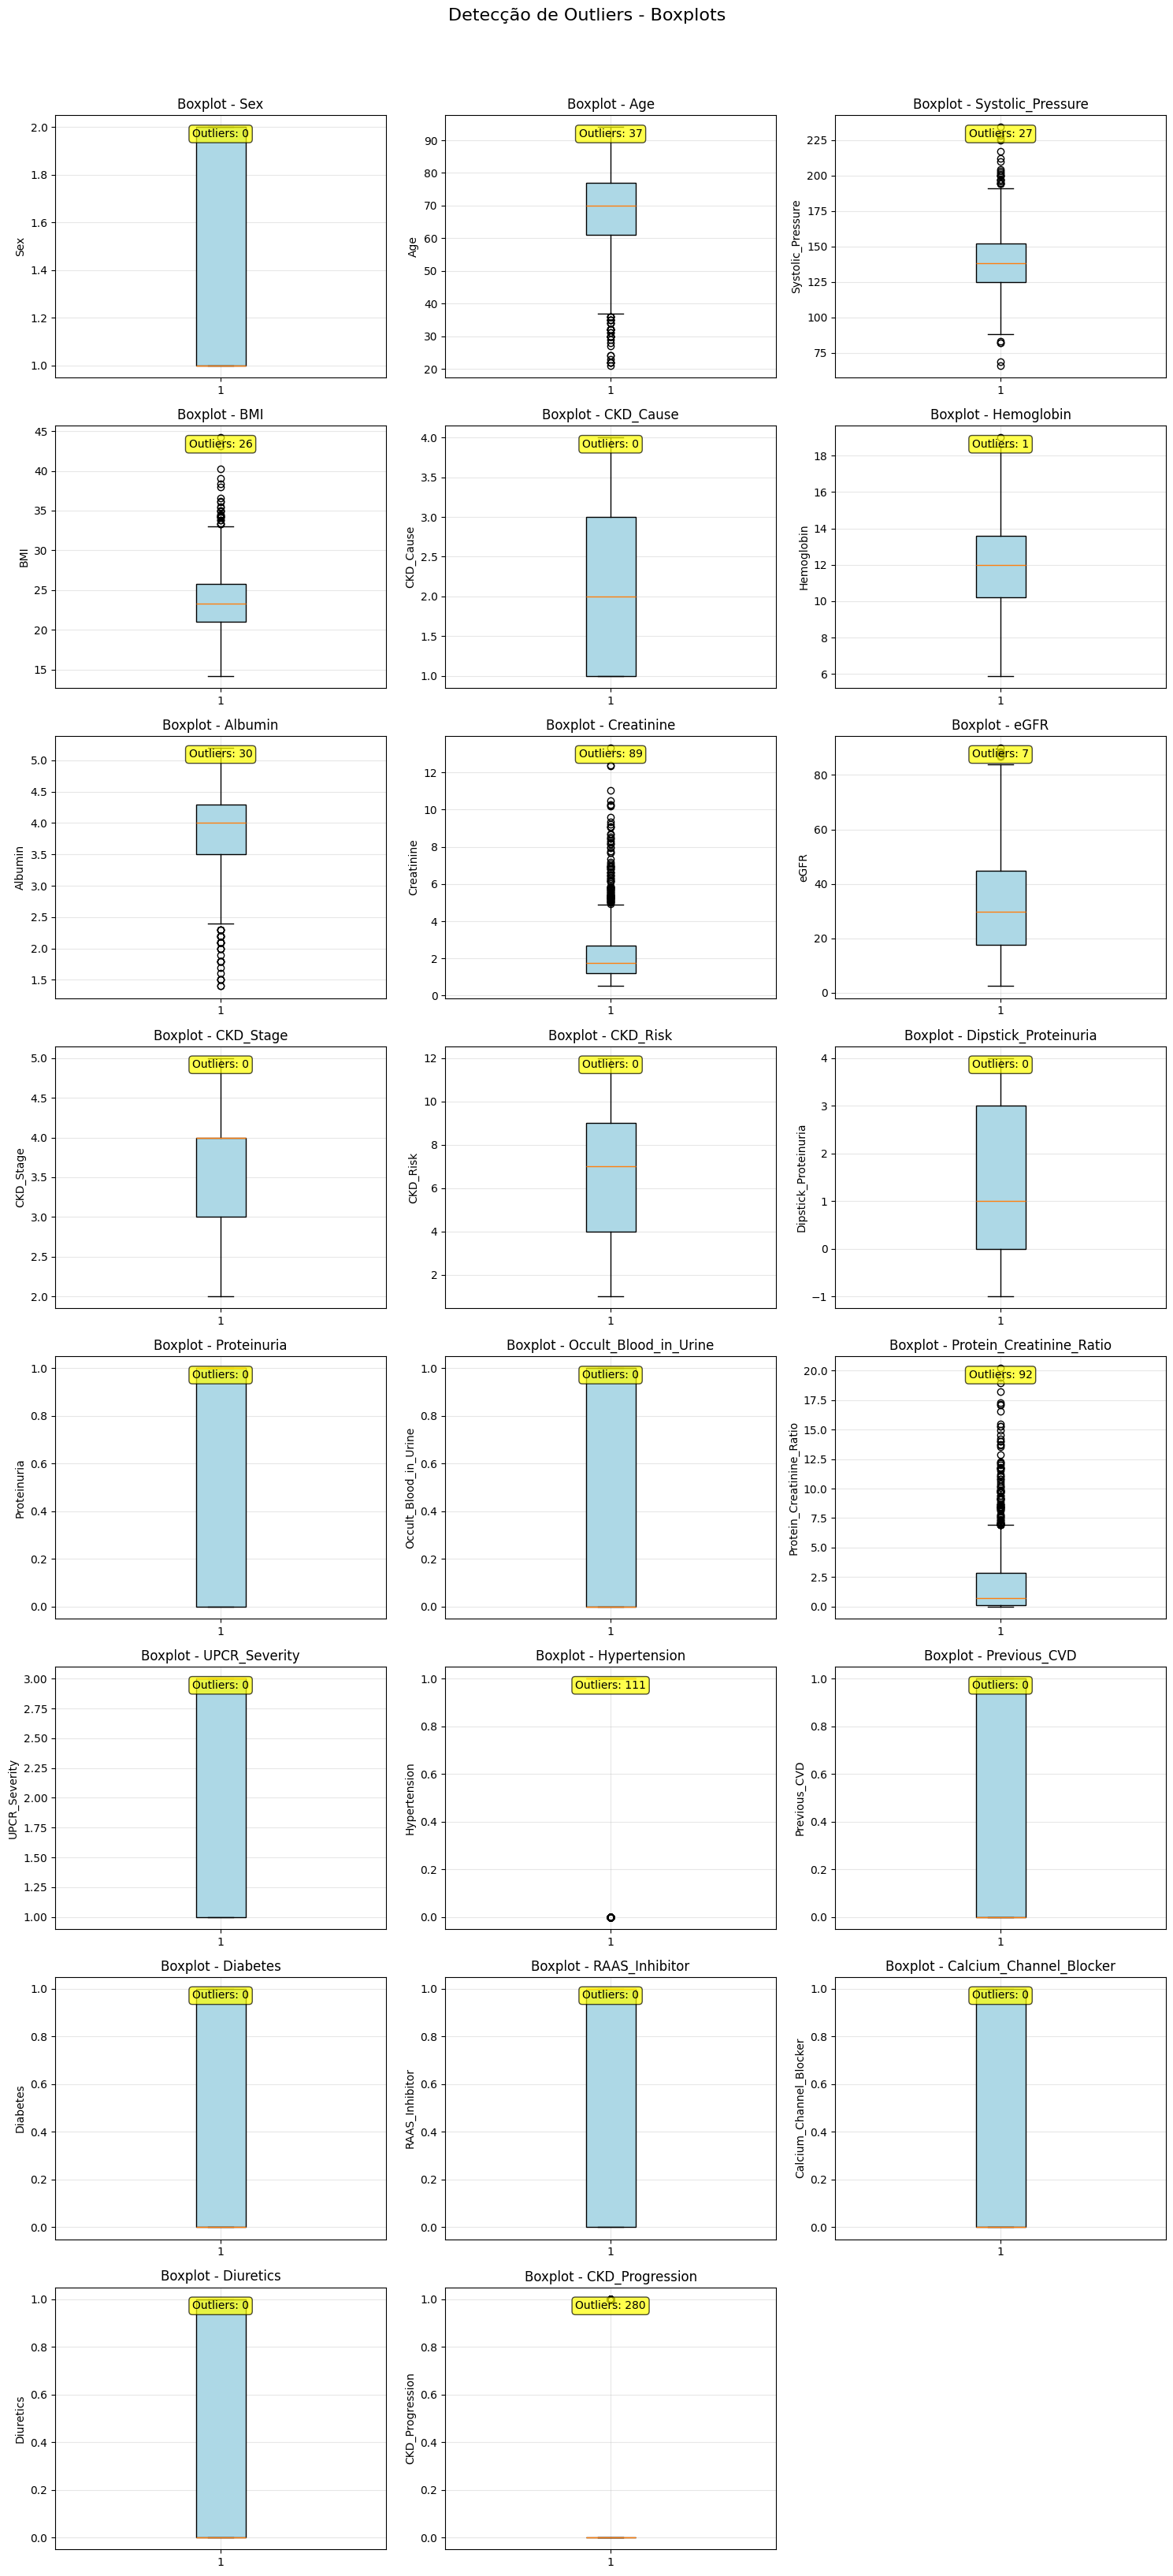

In [89]:
### M√©todo 3: Boxplots para visualizar outliers
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    # Boxplot
    box_plot = axes[i].boxplot(df[col].dropna(), patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightblue')
    
    axes[i].set_title(f'Boxplot - {col}')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)
    
    # Adicionar informa√ß√µes sobre outliers
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    axes[i].text(0.5, 0.95, f'Outliers: {outlier_count}', 
                transform=axes[i].transAxes, ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Remove eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Detec√ß√£o de Outliers - Boxplots', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


# 2 - Pr√©-processamento: 
Tratar valores faltantes. Normalizar ou padronizar atributos quando necess√°rio. Separar o conjunto de dados (sugest√£o: 70% treino, 15% teste, 15% valida√ß√£o).

In [90]:
# Converter todas as colunas para float64
df = df.astype('float64')

# Preencher valores faltantes com a m√©dia de cada coluna
df = df.apply(lambda col: col.fillna(col.mean()), axis=0)

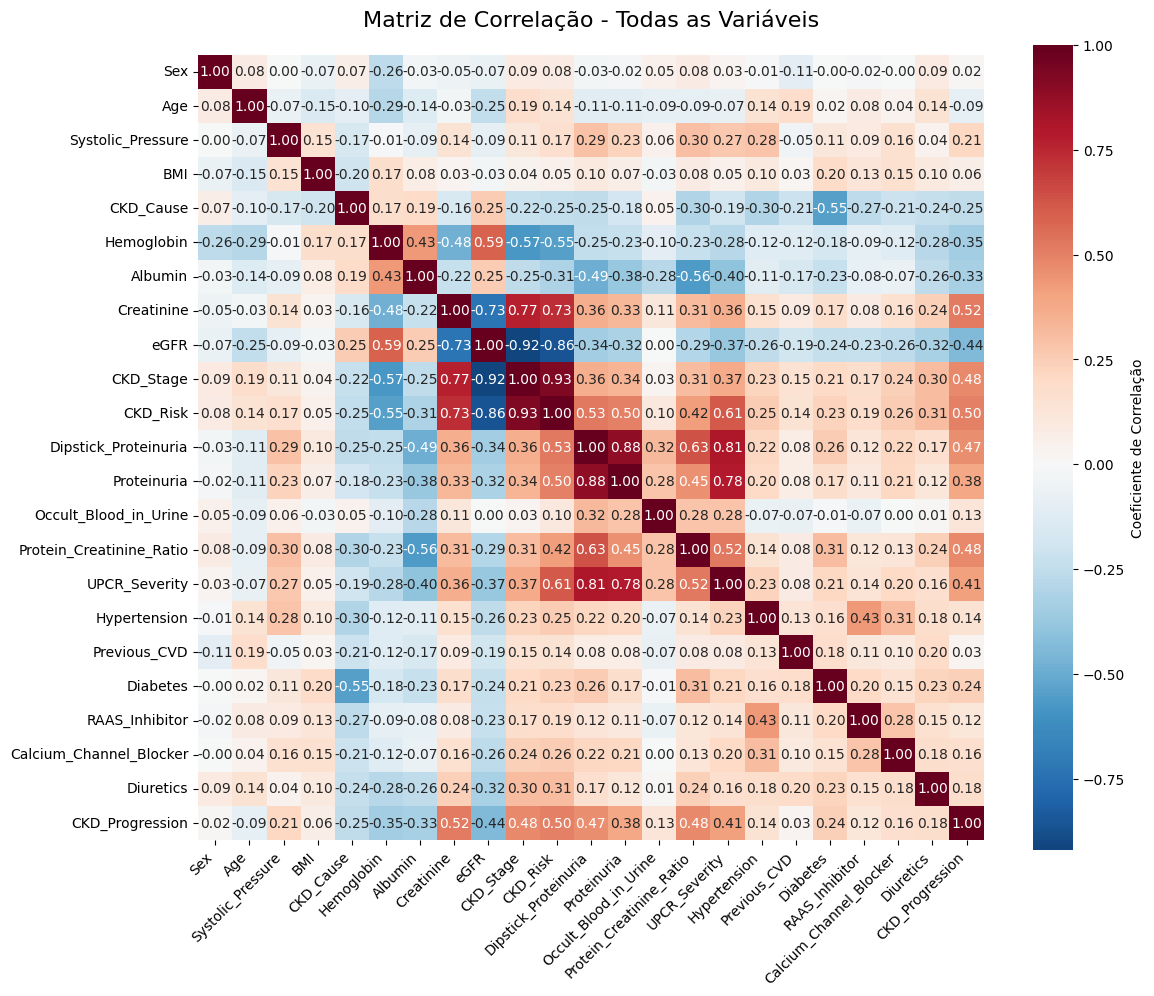

In [91]:
# Matriz de correla√ß√£o de todas as vari√°veis num√©ricas
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()

# Heatmap de correla√ß√£o
sns.heatmap(correlation_matrix, 
            annot=True,           # Mostrar valores
            cmap='RdBu_r',        # Cores: vermelho=positiva, azul=negativa
            center=0,             # Centro em 0
            square=True,          # C√©lulas quadradas
            fmt='.2f',            # 2 casas decimais
            cbar_kws={'label': 'Coeficiente de Correla√ß√£o'})

plt.title('Matriz de Correla√ß√£o - Todas as Vari√°veis', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [92]:
# Separa√ß√£o dos dados em treino, teste e valida√ß√£o
X = df.drop(columns=['CKD_Progression', 'CKD_Stage'])

y_progression = df['CKD_Progression']
y_stage = df['CKD_Stage']

# Para CKD_Progression
X_train_pg, X_temp_pg, y_train_pg, y_temp_pg = train_test_split(X, y_progression, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val_pg, X_test_pg, y_val_pg, y_test_pg = train_test_split(X_temp_pg, y_temp_pg, test_size=0.5, random_state=42)  # 15% val, 15% test

# Para CKD_Stage
X_train_st, X_temp_st, y_train_st, y_temp_st = train_test_split(X, y_stage, test_size=0.3, random_state=42)        # 70% train, 30% temp
X_val_st, X_test_st, y_val_st, y_test_st = train_test_split(X_temp_st, y_temp_st, test_size=0.5, random_state=42)  # 15% val, 15% test  

# Normalizar dados de treino
scaler = StandardScaler()
X_train_pg_norm = scaler.fit_transform(X_train_pg)
X_val_pg_norm = scaler.transform(X_val_pg)
X_test_pg_norm = scaler.transform(X_test_pg)

X_train_st_norm = scaler.fit_transform(X_train_st)
X_val_st_norm = scaler.transform(X_val_st)
X_test_st_norm = scaler.transform(X_test_st)

# 3 - Implementar tr√™s modelos de classifica√ß√£o:
√Årvores de Decis√£o, Redes Neurais Artificiais (MLP), e outra t√©cnica de aprendizado de m√°quina escolhida pela grupo do trabalho (entre as t√©cnicas estudadas na disciplina)
No presente caso foi escolhido SVM (Support Vector Machine).

### √Årvores de Decis√£o

In [93]:
# Treinar √°rvore de decis√£o para prever CKD_Progression
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_pg_norm, y_train_pg)

# Prever nos conjuntos de valida√ß√£o e teste
y_test_pred_pg = dtc.predict(X_test_pg_norm)
y_val_pred_pg = dtc.predict(X_val_pg_norm)

In [94]:
# Treinar √°rvore de decis√£o para prever CKD_Stage
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_st_norm, y_train_st)

# Prever nos conjuntos de valida√ß√£o e teste
y_test_pred_st = dtc.predict(X_test_st_norm)
y_val_pred_st = dtc.predict(X_val_st_norm)

### Rede neural profunda - MLP

#### Transforma√ß√£o do dataset para tensor

In [95]:
# Transformando os dados para tensores - CKD_PROGRESSION
# Dados normalizados para CKD_Progression
X_train_pg_tensor = torch.tensor(X_train_pg_norm, dtype=torch.float32).to('cuda')
y_train_pg_tensor = torch.tensor(y_train_pg.values, dtype=torch.float32).reshape(-1, 1).to('cuda')

X_val_pg_tensor = torch.tensor(X_val_pg_norm, dtype=torch.float32).to('cuda')
y_val_pg_tensor = torch.tensor(y_val_pg.values, dtype=torch.float32).reshape(-1, 1).to('cuda')

X_test_pg_tensor = torch.tensor(X_test_pg_norm, dtype=torch.float32).to('cuda')
y_test_pg_tensor = torch.tensor(y_test_pg.values, dtype=torch.float32).reshape(-1, 1).to('cuda')

In [96]:
# Transformando os dados para tensores - CKD_STAGE
# Dados normalizados para CKD_Stage
X_train_st_tensor = torch.tensor(X_train_st_norm, dtype=torch.float32).to('cuda')
y_train_st_tensor = torch.tensor(y_train_st.values, dtype=torch.float32).reshape(-1, 1).to('cuda')

X_val_st_tensor = torch.tensor(X_val_st_norm, dtype=torch.float32).to('cuda')
y_val_st_tensor = torch.tensor(y_val_st.values, dtype=torch.float32).reshape(-1, 1).to('cuda')

X_test_st_tensor = torch.tensor(X_test_st_norm, dtype=torch.float32).to('cuda')
y_test_st_tensor = torch.tensor(y_test_st.values, dtype=torch.float32).reshape(-1, 1).to('cuda')

#### Modelos MLP

In [97]:
# Modelo CKD_Stage para Classifica√ß√£o Multiclasse
class ModelCKD_Stage(nn.Module):
    def __init__(self, input_size=23, num_classes=5):
        super().__init__()
        self.l1 = nn.Linear(input_size, 64)
        self.norm1 = nn.BatchNorm1d(64)
        self.relu1 = nn.ReLU()
        self.drop1 = nn.Dropout(p=0.3)
        
        self.l2 = nn.Linear(64, 32)
        self.norm2 = nn.BatchNorm1d(32)
        self.relu2 = nn.ReLU()
        self.drop2 = nn.Dropout(p=0.2)
        
        self.l3 = nn.Linear(32, 16)
        self.relu3 = nn.ReLU()
        self.drop3 = nn.Dropout(p=0.1)
        
        self.l4 = nn.Linear(16, num_classes)  # 5 neur√¥nios para 5 classes (est√°gios 1-5)

        # Inicializa√ß√£o Xavier
        nn.init.xavier_uniform_(self.l1.weight)
        nn.init.xavier_uniform_(self.l2.weight)
        nn.init.xavier_uniform_(self.l3.weight)
        nn.init.xavier_uniform_(self.l4.weight)

    def forward(self, x):
        x = self.l1(x)
        x = self.norm1(x)
        x = self.relu1(x)
        x = self.drop1(x)
        
        x = self.l2(x)
        x = self.norm2(x)
        x = self.relu2(x)
        x = self.drop2(x)
        
        x = self.l3(x)
        x = self.relu3(x)
        x = self.drop3(x)
        
        x = self.l4(x)
        return x  # Raw logits

In [98]:
# Modelo para CKD_Progression (Classifica√ß√£o Bin√°ria)
class ModelCKD_Progression(nn.Module):
    def __init__(self, input_size=23):
        super().__init__()
        self.l1 = nn.Linear(input_size, 64)
        self.norm1 = nn.BatchNorm1d(64)
        self.relu1 = nn.ReLU()
        self.drop1 = nn.Dropout(p=0.3)
        
        self.l2 = nn.Linear(64, 32)
        self.norm2 = nn.BatchNorm1d(32)
        self.relu2 = nn.ReLU()
        self.drop2 = nn.Dropout(p=0.2)
        
        self.l3 = nn.Linear(32, 16)
        self.relu3 = nn.ReLU()
        self.drop3 = nn.Dropout(p=0.1)
        
        self.l4 = nn.Linear(16, 1)  # 1 neur√¥nio para classifica√ß√£o bin√°ria
        self.sigmoid = nn.Sigmoid()  # Para probabilidades [0,1]

        # Inicializa√ß√£o Xavier
        nn.init.xavier_uniform_(self.l1.weight)
        nn.init.xavier_uniform_(self.l2.weight)
        nn.init.xavier_uniform_(self.l3.weight)
        nn.init.xavier_uniform_(self.l4.weight)

    def forward(self, x):
        x = self.l1(x)
        x = self.norm1(x)
        x = self.relu1(x)
        x = self.drop1(x)
        
        x = self.l2(x)
        x = self.norm2(x)
        x = self.relu2(x)
        x = self.drop2(x)
        
        x = self.l3(x)
        x = self.relu3(x)
        x = self.drop3(x)
        
        x = self.l4(x)
        x = self.sigmoid(x)  # Sa√≠da entre 0 e 1
        return x

#### Treinamento

In [99]:
# TREINAMENTO - CKD_PROGRESSION (Classifica√ß√£o Bin√°ria)
print("=== TREINAMENTO - CKD_PROGRESSION ===")

# Criar modelo
model_progression = ModelCKD_Progression(input_size=X_train_pg_tensor.shape[1]).to(device)
#model_progression = torch.compile(model_progression)

# Loss para classifica√ß√£o bin√°ria
criterion = nn.BCELoss()  # Binary Cross Entropy

# Dataset e DataLoader
train_dataset = TensorDataset(X_train_pg_tensor, y_train_pg_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)

# Optimizer
optimizer = torch.optim.Adam(model_progression.parameters(), lr=1e-3, weight_decay=1e-4)

# Scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=15, factor=0.5, verbose=True)

# Tracking
history_prog = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
best_val_loss = float('inf')
best_weights = None
patience = 0
max_patience = 30
n_epochs = 200

print(f"Dispositivo: {device}")
print(f"Arquitetura: {model_progression}")
print(f"Par√¢metros: {sum(p.numel() for p in model_progression.parameters())}")

for epoch in range(n_epochs):
    # === TREINAMENTO ===
    model_progression.train()
    train_losses = []
    train_correct = 0
    train_total = 0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        y_pred = model_progression(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model_progression.parameters(), max_norm=1.0)
        
        optimizer.step()
        train_losses.append(loss.item())
        
        # Calcular acur√°cia
        predicted = (y_pred > 0.5).float()
        train_total += y_batch.size(0)
        train_correct += (predicted == y_batch).sum().item()
    
    # === VALIDA√á√ÉO ===
    model_progression.eval()
    with torch.no_grad():
        val_pred = model_progression(X_val_pg_tensor)
        val_loss = criterion(val_pred, y_val_pg_tensor).item()
        
        # Acur√°cia de valida√ß√£o
        val_predicted = (val_pred > 0.5).float()
        val_correct = (val_predicted == y_val_pg_tensor).sum().item()
        val_total = y_val_pg_tensor.size(0)
    
    # M√©tricas do epoch
    train_loss = np.mean(train_losses)
    train_acc = 100 * train_correct / train_total
    val_acc = 100 * val_correct / val_total
    
    # Scheduler
    scheduler.step(val_loss)
    
    # Salvar hist√≥rico
    history_prog['train_loss'].append(train_loss)
    history_prog['val_loss'].append(val_loss)
    history_prog['train_acc'].append(train_acc)
    history_prog['val_acc'].append(val_acc)
    
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_weights = model_progression.state_dict().copy()
        patience = 0
        improvement = "‚úì"
    else:
        patience += 1
        improvement = ""
    
    # Print a cada 10 epochs
    if (epoch + 1) % 10 == 0 or epoch < 5:
        print(f"Epoch {epoch+1:3d} | "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}% | "
              f"Patience: {patience}/{max_patience} {improvement}")
    
    if patience >= max_patience:
        print(f"\nEarly stopping no epoch {epoch+1}!")
        break

# Carregar melhor modelo
model_progression.load_state_dict(best_weights)
print(f"\nTreinamento conclu√≠do! Melhor Val Loss: {best_val_loss:.4f}")

=== TREINAMENTO - CKD_PROGRESSION ===
Dispositivo: cuda
Arquitetura: ModelCKD_Progression(
  (l1): Linear(in_features=21, out_features=64, bias=True)
  (norm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (drop1): Dropout(p=0.3, inplace=False)
  (l2): Linear(in_features=64, out_features=32, bias=True)
  (norm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (drop2): Dropout(p=0.2, inplace=False)
  (l3): Linear(in_features=32, out_features=16, bias=True)
  (relu3): ReLU()
  (drop3): Dropout(p=0.1, inplace=False)
  (l4): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Par√¢metros: 4225


/home/aki/miniconda3/envs/myenv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch   1 | Train Loss: 0.7727 | Train Acc: 48.74% | Val Loss: 0.5890 | Val Acc: 72.51% | Patience: 0/30 ‚úì
Epoch   2 | Train Loss: 0.5290 | Train Acc: 74.12% | Val Loss: 0.4794 | Val Acc: 79.53% | Patience: 0/30 ‚úì
Epoch   3 | Train Loss: 0.4538 | Train Acc: 79.15% | Val Loss: 0.4225 | Val Acc: 83.04% | Patience: 0/30 ‚úì
Epoch   4 | Train Loss: 0.4124 | Train Acc: 80.15% | Val Loss: 0.4000 | Val Acc: 83.63% | Patience: 0/30 ‚úì
Epoch   5 | Train Loss: 0.3861 | Train Acc: 80.90% | Val Loss: 0.3890 | Val Acc: 84.21% | Patience: 0/30 ‚úì
Epoch  10 | Train Loss: 0.3339 | Train Acc: 84.42% | Val Loss: 0.3671 | Val Acc: 85.38% | Patience: 0/30 ‚úì
Epoch  20 | Train Loss: 0.3070 | Train Acc: 86.18% | Val Loss: 0.3764 | Val Acc: 85.96% | Patience: 10/30 
Epoch  30 | Train Loss: 0.2847 | Train Acc: 86.93% | Val Loss: 0.3832 | Val Acc: 84.80% | Patience: 20/30 
Epoch  40 | Train Loss: 0.2859 | Train Acc: 88.32% | Val Loss: 0.3888 | Val Acc: 85.38% | Patience: 30/30 

Early stopping no epoch 

In [100]:
# TREINAMENTO - CKD_STAGE (Classifica√ß√£o Multiclasse)
print("\n=== TREINAMENTO - CKD_STAGE ===")

# Converter para classes (1,2,3,4,5) -> (0,1,2,3,4)
y_train_st_classes = (y_train_st_tensor - 1).long().squeeze()
y_val_st_classes = (y_val_st_tensor - 1).long().squeeze()

# Criar modelo
model_stage = ModelCKD_Stage(input_size=X_train_st_tensor.shape[1], num_classes=5).to(device)
#model_stage = torch.compile(model_stage)

# Loss para classifica√ß√£o multiclasse
criterion = nn.CrossEntropyLoss()

# Dataset e DataLoader
train_dataset = TensorDataset(X_train_st_tensor, y_train_st_classes)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)

# Optimizer
optimizer = torch.optim.Adam(model_stage.parameters(), lr=1e-3, weight_decay=1e-4)

# Scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=15, factor=0.5, verbose=True)

# Tracking
history_stage = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
best_val_loss = float('inf')
best_weights = None
patience = 0
max_patience = 30
n_epochs = 200

print(f"Classes: {torch.unique(y_train_st_classes)}")
print(f"Distribui√ß√£o: {torch.bincount(y_train_st_classes)}")

for epoch in range(n_epochs):
    # === TREINAMENTO ===
    model_stage.train()
    train_losses = []
    train_correct = 0
    train_total = 0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        y_pred = model_stage(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model_stage.parameters(), max_norm=1.0)
        
        optimizer.step()
        train_losses.append(loss.item())
        
        # Acur√°cia
        _, predicted = torch.max(y_pred.data, 1)
        train_total += y_batch.size(0)
        train_correct += (predicted == y_batch).sum().item()
    
    # === VALIDA√á√ÉO ===
    model_stage.eval()
    with torch.no_grad():
        val_pred = model_stage(X_val_st_tensor)
        val_loss = criterion(val_pred, y_val_st_classes).item()
        
        # Acur√°cia de valida√ß√£o
        _, val_predicted = torch.max(val_pred.data, 1)
        val_correct = (val_predicted == y_val_st_classes).sum().item()
        val_total = y_val_st_classes.size(0)
    
    # M√©tricas do epoch
    train_loss = np.mean(train_losses)
    train_acc = 100 * train_correct / train_total
    val_acc = 100 * val_correct / val_total
    
    scheduler.step(val_loss)
    
    # Salvar hist√≥rico
    history_stage['train_loss'].append(train_loss)
    history_stage['val_loss'].append(val_loss)
    history_stage['train_acc'].append(train_acc)
    history_stage['val_acc'].append(val_acc)
    
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_weights = model_stage.state_dict().copy()
        patience = 0
        improvement = "‚úì"
    else:
        patience += 1
        improvement = ""
    
    # Print a cada 10 epochs
    if (epoch + 1) % 10 == 0 or epoch < 5:
        print(f"Epoch {epoch+1:3d} | "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}% | "
              f"Patience: {patience}/{max_patience} {improvement}")
    
    if patience >= max_patience:
        print(f"\nEarly stopping no epoch {epoch+1}!")
        break

# Carregar melhor modelo
model_stage.load_state_dict(best_weights)
print(f"\nTreinamento conclu√≠do! Melhor Val Loss: {best_val_loss:.4f}")


=== TREINAMENTO - CKD_STAGE ===
Classes: tensor([1, 2, 3, 4], device='cuda:0')
Distribui√ß√£o: tensor([  0,  72, 331, 253, 140], device='cuda:0')
Epoch   1 | Train Loss: 1.4386 | Train Acc: 40.58% | Val Loss: 1.2405 | Val Acc: 56.73% | Patience: 0/30 ‚úì
Epoch   2 | Train Loss: 1.1875 | Train Acc: 51.38% | Val Loss: 1.0303 | Val Acc: 67.84% | Patience: 0/30 ‚úì
Epoch   3 | Train Loss: 1.0460 | Train Acc: 56.91% | Val Loss: 0.8697 | Val Acc: 71.93% | Patience: 0/30 ‚úì
Epoch   4 | Train Loss: 0.8987 | Train Acc: 63.44% | Val Loss: 0.7507 | Val Acc: 74.27% | Patience: 0/30 ‚úì
Epoch   5 | Train Loss: 0.8252 | Train Acc: 65.33% | Val Loss: 0.6618 | Val Acc: 81.87% | Patience: 0/30 ‚úì
Epoch  10 | Train Loss: 0.4778 | Train Acc: 81.28% | Val Loss: 0.3514 | Val Acc: 91.81% | Patience: 0/30 ‚úì
Epoch  20 | Train Loss: 0.2928 | Train Acc: 89.20% | Val Loss: 0.1439 | Val Acc: 98.25% | Patience: 0/30 ‚úì
Epoch  30 | Train Loss: 0.1950 | Train Acc: 92.71% | Val Loss: 0.1014 | Val Acc: 97.66% | 

### Support Vector Machine (SVM)

In [101]:
# SVM para CKD_Progression
# Treinar SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_pg_norm, y_train_pg)

# Prever nos conjuntos de valida√ß√£o e teste
y_val_svm_pred = svm_model.predict(X_val_pg_norm)
y_test_svm_pred = svm_model.predict(X_test_pg_norm)

In [102]:
# SVM para CKD_Stage
# Treinar SVM
svm_model_stage = SVC(kernel='rbf', probability=True, random_state=42)
svm_model_stage.fit(X_train_st_norm, y_train_st)

# Prever nos conjuntos de valida√ß√£o e teste
y_val_svm_stage_pred = svm_model_stage.predict(X_val_st_norm)
y_test_svm_stage_pred = svm_model_stage.predict(X_test_st_norm)

# 4 - Avalia√ß√£o dos Modelos:
Avaliar e comparar o desempenho dos modelos com as seguintes m√©tricas: Acur√°cia, Precis√£o, Revoca√ß√£o (Recall), F1-Score, Matriz de Confus√£o e √Årea sob a curva ROC (AUC), se aplic√°vel. Comentar sobre os casos de falso positivo e falso negativo, e suas implica√ß√µes na √°rea da sa√∫de.

#### Fun√ß√µes

In [103]:
def add_model_results(results_list, model_name, acc, prec, rec, f1, auc=None):
    """
    Adiciona resultados de um modelo √† lista de resultados.
    - results_list: lista de dicion√°rios (acumulador)
    - model_name: nome do modelo (str)
    - acc, prec, rec, f1: m√©tricas (float)
    - auc: √°rea sob a curva ROC (float, opcional)
    """
    results_list.append({
        'Modelo': model_name,
        'Acur√°cia': acc,
        'Precis√£o': prec,
        'Recall': rec,
        'F1-Score': f1,
        'AUC': auc
    })

def resultados_dataframe(results_list):
    """
    Converte a lista de resultados em um DataFrame ordenado por F1-Score.
    """
    df = pd.DataFrame(results_list)
    return df.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)


def plot_comparacao_resultados(df_resultados):
	metrics = ['Acur√°cia', 'F1-Score', 'Precis√£o', 'Recall']
	if df_resultados['AUC'].notnull().any():
		metrics.append('AUC')

	fig, axes = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 5))
	if len(metrics) == 1:
		axes = [axes]

	model_colors = plt.cm.tab10.colors  # at√© 10 cores diferentes

	for i, metric in enumerate(metrics):
		ax = axes[i]
		bars = ax.bar(df_resultados['Modelo'], df_resultados[metric], color=model_colors[:len(df_resultados)])
		ax.set_title(f'Compara√ß√£o de {metric}', pad=20)
		ax.set_ylabel(metric)
		ax.set_xlabel('Modelo')
		ax.set_ylim(0, 1)
		for idx, bar in enumerate(bars):
			val = bar.get_height()
			ax.text(bar.get_x() + bar.get_width()/2, val * 0.5, f"{val:.2f}",
					ha='center', va='center', fontsize=12, color='white', fontweight='bold')
		ax.grid(axis='y', alpha=0.3)

	plt.tight_layout()
	plt.show()

# Matrizes de confuz√£o
def plot_confusion_matrix(cm, title='Matriz de Confus√£o', labels=None):
	plt.figure(figsize=(8, 6))
	sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
				xticklabels=labels, yticklabels=labels)
	plt.title(title)
	plt.xlabel('Predito')
	plt.ylabel('Verdadeiro')
	plt.tight_layout()
	plt.show()

#### Resultados

In [104]:
# === √Årvore de Decis√£o - CKD_Stage ===
acc_dt_st = accuracy_score(y_test_st, y_test_pred_st)
prec_dt_st = precision_score(y_test_st, y_test_pred_st, average='weighted')
rec_dt_st = recall_score(y_test_st, y_test_pred_st, average='weighted')
f1_dt_st = f1_score(y_test_st, y_test_pred_st, average='weighted')
cm_dt_st = confusion_matrix(y_test_st, y_test_pred_st)

# === √Årvore de Decis√£o - CKD_Progression ===
acc_dt = accuracy_score(y_test_pg, y_test_pred_pg)
prec_dt = precision_score(y_test_pg, y_test_pred_pg)
rec_dt = recall_score(y_test_pg, y_test_pred_pg)
f1_dt = f1_score(y_test_pg, y_test_pred_pg)
cm_dt = confusion_matrix(y_test_pg, y_test_pred_pg)
auc_dt = roc_auc_score(y_test_pg, y_test_pred_pg)

# === MLP (PyTorch) - CKD_Stage ===
model_stage.eval()
with torch.no_grad():
	y_pred_stage_logits = model_stage(X_test_st_tensor)
	y_pred_stage = torch.argmax(y_pred_stage_logits, dim=1).cpu().numpy() + 1

acc_mlp_st = accuracy_score(y_test_st, y_pred_stage)
prec_mlp_st = precision_score(y_test_st, y_pred_stage, average='weighted')
rec_mlp_st = recall_score(y_test_st, y_pred_stage, average='weighted')
f1_mlp_st = f1_score(y_test_st, y_pred_stage, average='weighted')
cm_mlp_st = confusion_matrix(y_test_st, y_pred_stage)

# === MLP (PyTorch) - CKD_Progression ===
model_progression.eval()
with torch.no_grad():
	y_pred_mlp_prob = model_progression(X_test_pg_tensor).cpu().numpy().flatten()
	y_pred_mlp_pg = (y_pred_mlp_prob > 0.5).astype(int)

acc_mlp_pg = accuracy_score(y_test_pg, y_pred_mlp_pg)
prec_mlp_pg = precision_score(y_test_pg, y_pred_mlp_pg)
rec_mlp_pg = recall_score(y_test_pg, y_pred_mlp_pg)
f1_mlp_pg = f1_score(y_test_pg, y_pred_mlp_pg)
cm_mlp_pg = confusion_matrix(y_test_pg, y_pred_mlp_pg)
auc_mlp_pg = roc_auc_score(y_test_pg, y_pred_mlp_prob)

# === SVM - CKD_Stage ===
acc_svm_st = accuracy_score(y_test_st, y_test_svm_stage_pred)
prec_svm_st = precision_score(y_test_st, y_test_svm_stage_pred, average='weighted')
rec_svm_st = recall_score(y_test_st, y_test_svm_stage_pred, average='weighted')
f1_svm_st = f1_score(y_test_st, y_test_svm_stage_pred, average='weighted')
cm_svm_st = confusion_matrix(y_test_st, y_test_svm_stage_pred)

# === SVM - CKD_Progression ===
acc_svm_pg = accuracy_score(y_test_pg, y_test_svm_pred)
prec_svm_pg = precision_score(y_test_pg, y_test_svm_pred)
rec_svm_pg = recall_score(y_test_pg, y_test_svm_pred)
f1_svm_pg = f1_score(y_test_pg, y_test_svm_pred)
cm_svm_pg = confusion_matrix(y_test_pg, y_test_svm_pred)
auc_svm_pg = roc_auc_score(y_test_pg, y_test_svm_pred)


In [105]:
resultados = []
add_model_results(resultados, 'AD_S', acc_dt_st, prec_dt_st, rec_dt_st, f1_dt_st)
add_model_results(resultados, 'AD_P', acc_dt, prec_dt, rec_dt, f1_dt, auc_dt)
add_model_results(resultados, 'MLP_S', acc_mlp_st, prec_mlp_st, rec_mlp_st, f1_mlp_st)
add_model_results(resultados, 'MLP_P', acc_mlp_pg, prec_mlp_pg, rec_mlp_pg, f1_mlp_pg, auc_mlp_pg)
add_model_results(resultados, 'SVM_S', acc_svm_st, prec_svm_st, rec_svm_st, f1_svm_st)
add_model_results(resultados, 'SVM_P', acc_svm_pg, prec_svm_pg, rec_svm_pg, f1_svm_pg, auc_svm_pg)

df_resultados = resultados_dataframe(resultados)
display(df_resultados)

Modelo  Acur√°cia  Precis√£o    Recall  F1-Score       AUC
0   AD_S  0.988304  0.988729  0.988304  0.988344       NaN
1  MLP_S  0.988304  0.988412  0.988304  0.988231       NaN
2  SVM_S  0.982456  0.982881  0.982456  0.982416       NaN
3  MLP_P  0.807018  0.620000  0.688889  0.652632  0.880071
4  SVM_P  0.836257  0.757576  0.555556  0.641026  0.746032
5   AD_P  0.824561  0.702703  0.577778  0.634146  0.745238

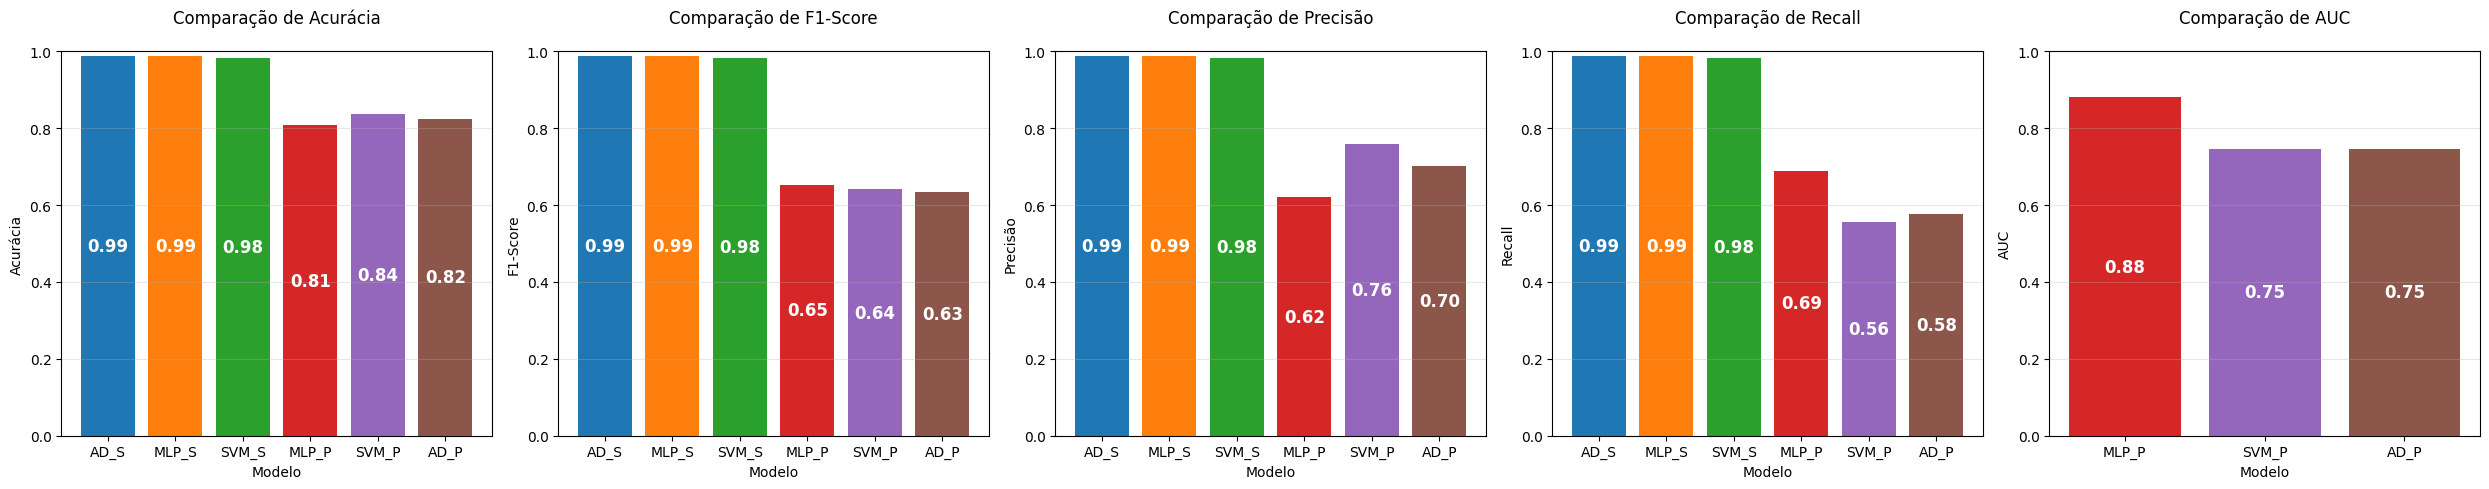

In [106]:
plot_comparacao_resultados(df_resultados)


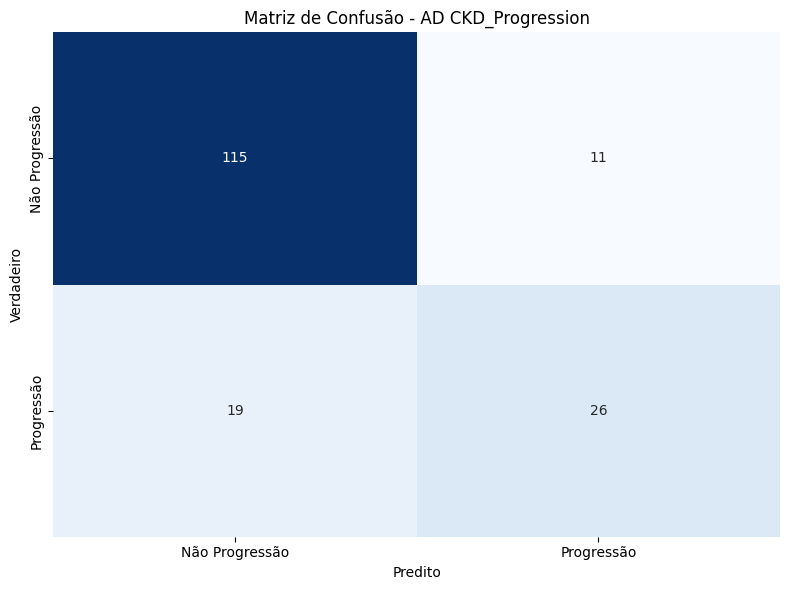

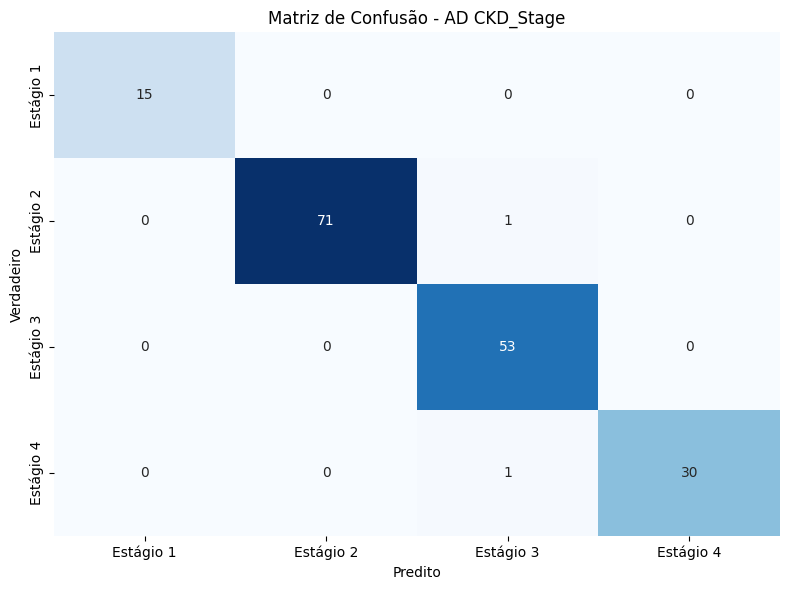

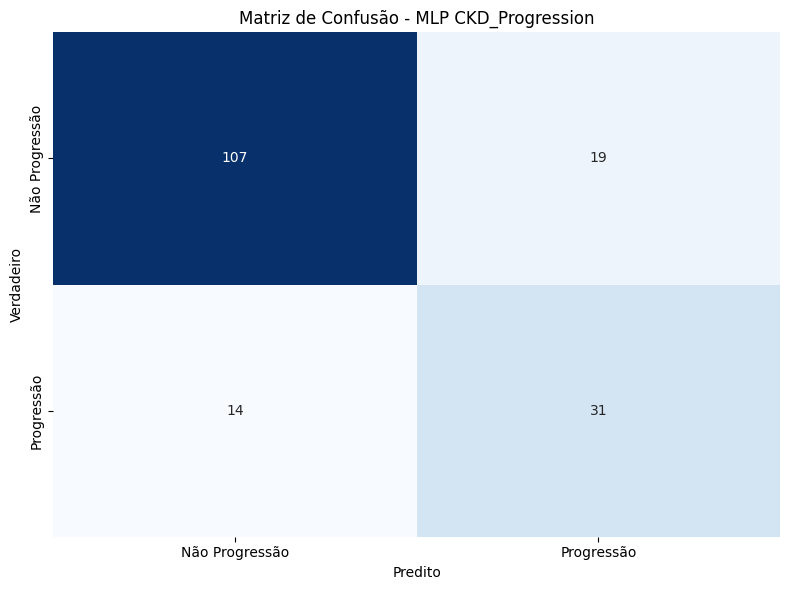

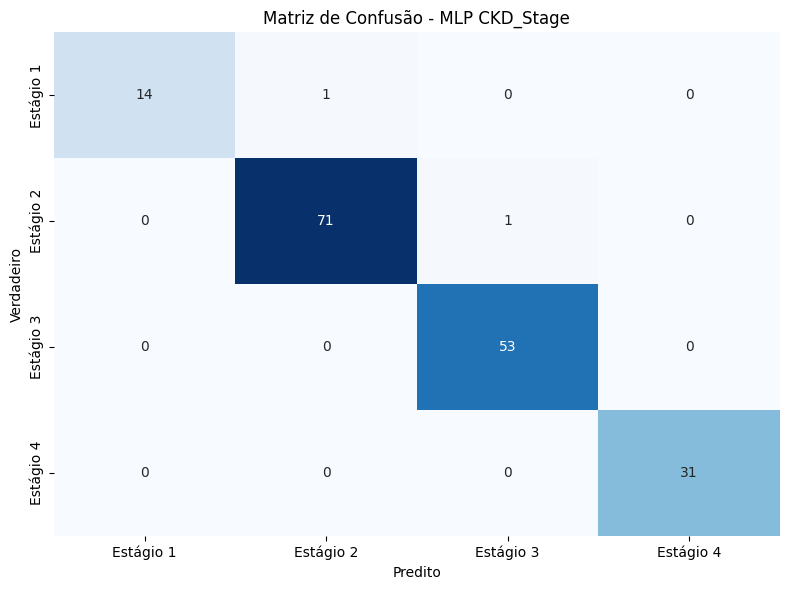

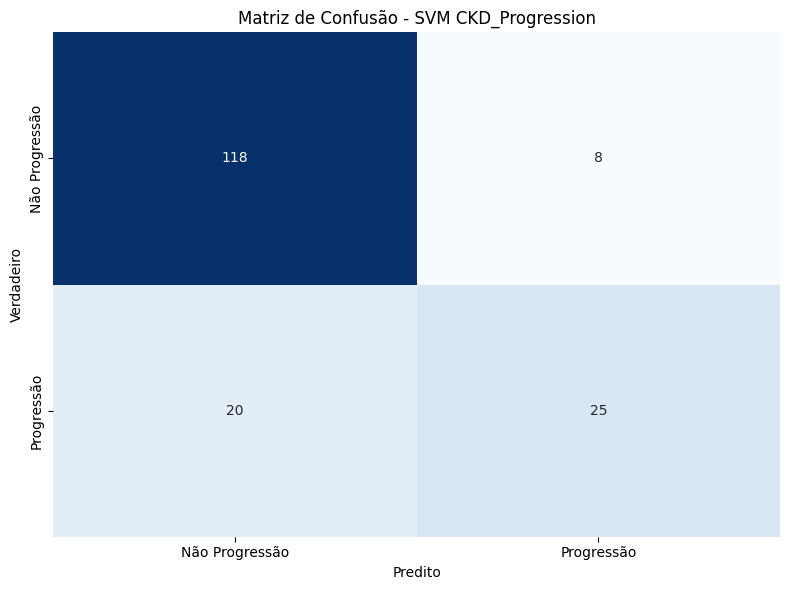

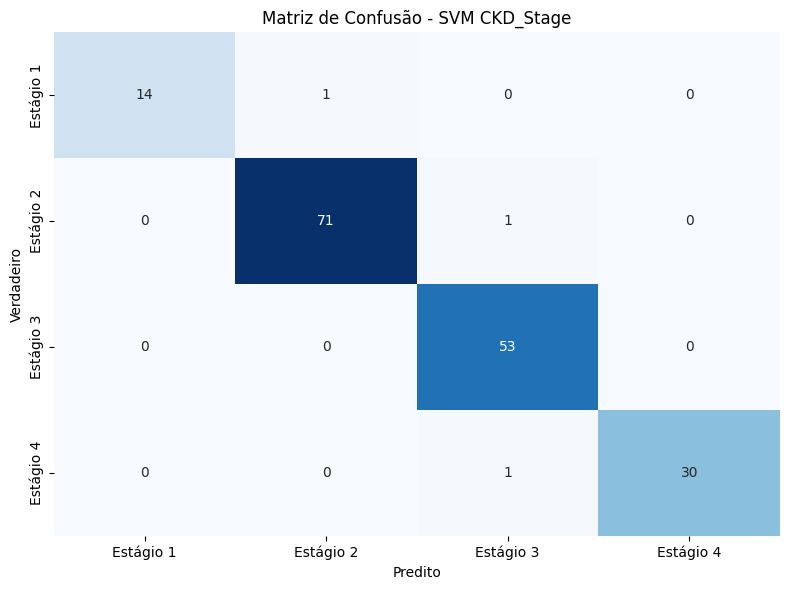

In [107]:
# Plotar matrizes de confus√£o para cada modelo e tarefa

# √Årvore de Decis√£o
plot_confusion_matrix(cm_dt, title='Matriz de Confus√£o - AD CKD_Progression', 
					  labels=['N√£o Progress√£o', 'Progress√£o'])
plot_confusion_matrix(cm_dt_st, title='Matriz de Confus√£o - AD CKD_Stage', 
					  labels=['Est√°gio 1', 'Est√°gio 2', 'Est√°gio 3', 'Est√°gio 4'])

# MLP
plot_confusion_matrix(cm_mlp_pg, title='Matriz de Confus√£o - MLP CKD_Progression', 
					  labels=['N√£o Progress√£o', 'Progress√£o'])
plot_confusion_matrix(cm_mlp_st, title='Matriz de Confus√£o - MLP CKD_Stage', 
					  labels=['Est√°gio 1', 'Est√°gio 2', 'Est√°gio 3', 'Est√°gio 4'])

# SVM
plot_confusion_matrix(cm_svm_pg, title='Matriz de Confus√£o - SVM CKD_Progression', 
					  labels=['N√£o Progress√£o', 'Progress√£o'])
plot_confusion_matrix(cm_svm_st, title='Matriz de Confus√£o - SVM CKD_Stage', 
					  labels=['Est√°gio 1', 'Est√°gio 2', 'Est√°gio 3', 'Est√°gio 4'])

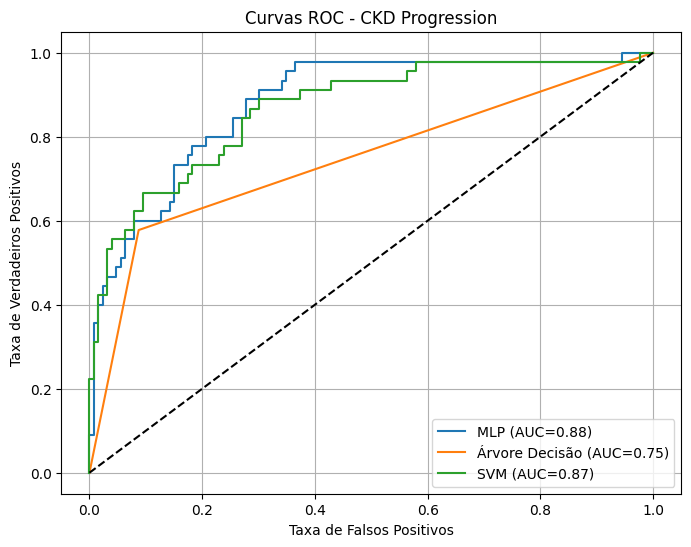

In [108]:
# ROC Curves
plt.figure(figsize=(8, 6))

# MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test_pg, y_pred_mlp_prob)
auc_mlp = roc_auc_score(y_test_pg, y_pred_mlp_prob)
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC={auc_mlp:.2f})')

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_pg, y_test_pred_pg)
auc_dt = roc_auc_score(y_test_pg, y_test_pred_pg)
plt.plot(fpr_dt, tpr_dt, label=f'√Årvore Decis√£o (AUC={auc_dt:.2f})')

# SVM
svm_probs = svm_model.predict_proba(X_test_pg_norm)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test_pg, svm_probs)
auc_svm = roc_auc_score(y_test_pg, svm_probs)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC={auc_svm:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC - CKD Progression')
plt.legend()
plt.grid(True)
plt.show()